# Chapter 12 - Reactive flow and the emergence of melt channels

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import numpy.matlib
from scipy.optimize import fsolve
from scipy.linalg import det
from cycler import cycler

## Linearised stability analysis

### The base state

The assembled, base-state solution is given by


\begin{alignat}{3}
     \label{eq:rxflow-base-state-solution}
    \usat\zeroth &= \left(1+\dpro\right)\e^{\rpro z} - \dpro
    &&\approx 1 + \left(1+\dpro\right) \rpro z,\\
    -\cmppres\zeroth &= \usat\zeroth+\dpro &&\approx
    \left(1+\dpro\right) \left(1 + \rpro z\right),\\
    \por\zeroth &= \left[\frac{\usat\zeroth}
      {1+\stiff\rpro\left(\usat\zeroth+\dpro\right)}\right]^{1/\permexp}
    &&\approx  \cbasestate^{-1}\left[1 + 
      \left(1+\dpro\right) \rpro z/n\right].\\
    w\zeroth &= \left[\frac{1+\stiff\rpro\left(\usat\zeroth+\dpro\right)}
      {\left(\usat\zeroth\right)^{1-\permexp}}\right]^{1/\permexp} 
    &&\approx \cbasestate\left[1 + \left(1+\dpro\right)(1-1/n) \rpro z\right].
\end{alignat}


The base-state solution (1)-(4), are plotted below for two values of $\rpro$. Thick lines are the full solution and narrow lines are the linear approximation. In each case, $\stiff=1$, $\dpro=1$ and $\permexp=3$. The values of $\por\zeroth$ (panel __(c)__) and $w\zeroth$ (panel __(d)__) at $z=0$ are given by $\cbasestate^{-1}$ and $\cbasestate$, respectively.

In [4]:
n = 3.0
G = 1.0
M = np.asarray([0.01, 0.1])
S = 1.0
H = 1.0
z = np.linspace(0.0, H, 1000)

F = np.power([1.0 + S*m*(1+G) for m in M], 1/n)
chi = np.asarray([(1.+G)*np.exp(m*z) - G for m in M])
cmp = -(chi + G)
phi = np.power([chij/(1.0 - S*m*cmpj) for chij, m, cmpj in zip(chi, M, cmp)], 1.0/n)
w = chi/phi
cmpl = -(1.0+G) * np.asarray([1.0 + m*z for m in M])
chil = 1.0 + np.asarray([m*(1+G)*z for m in M])
phil = np.asarray([1.0/Fj * (1.0 + m*(1.0 + G)/n*z) for Fj, m in zip(F, M)])
wl = np.asarray([Fj*(1.0 + m*(1.0+G)*(1.0-1.0/n)*z) for Fj, m in zip(F, M)])

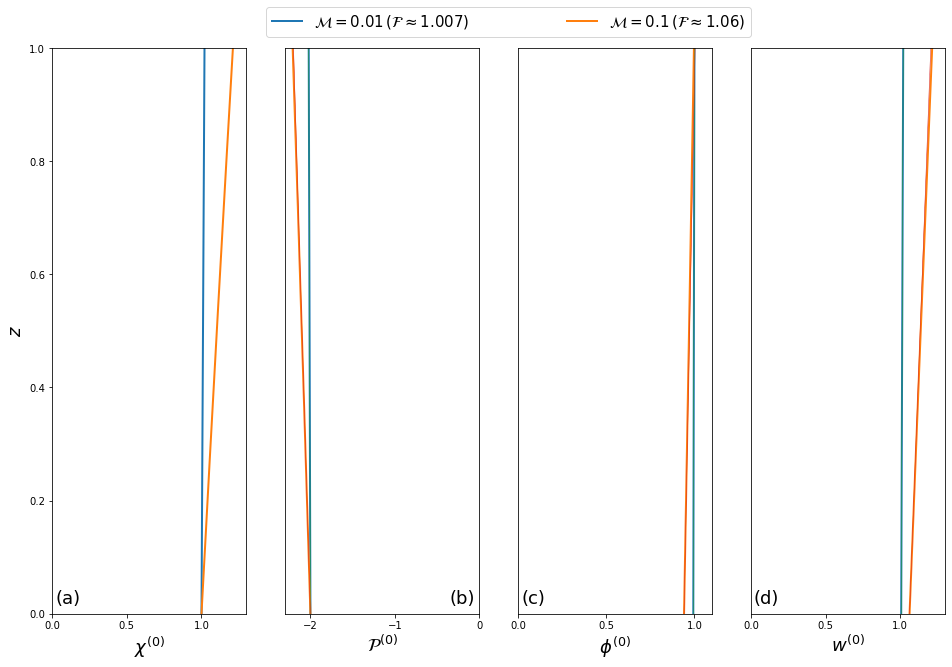

In [5]:
f, ax = plt.subplots(1, 4)
zoom = 2.0
f.set_size_inches(8.0 * zoom, 5.2 * zoom)
f.set_facecolor('w')

plt.rc('axes', prop_cycle=(cycler(color=['k', 'k', 'k', 'k']) + cycler(linestyle=['-', '--', ':', '-.'])))

lines = ax[0].plot(chi.transpose(), z, linewidth=2.0)
ax[0].set_xlabel(r'$\chi^{(0)}$', fontsize=18)
ax[0].set_xlim(0.0, 1.3)
ax[0].set_xticks((0.0, 0.5, 1.0))
ax[0].set_ylabel('$z$', fontsize=18)
ax[0].set_ylim(0.0, 1.0)
ax[0].text(0.02, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')
plt.legend(handles=(lines[0], lines[1]), 
           labels=(r'$\mathcal{M}=0.01\,(\mathcal{F}\approx1.007)$', r'$\mathcal{M}=0.1\,(\mathcal{F}\approx1.06)$'),
           fontsize=15, bbox_to_anchor=(-2.5, 1.02, 2.5, .2),
           loc='lower right', ncol=2, mode="expand", borderaxespad=0.)

ax[1].plot(cmp.transpose(), z, linewidth=2.0)
ax[1].plot(cmpl.transpose(), z, linewidth=0.5)
ax[1].set_xlabel(r'$\mathcal{P}^{(0)}$', fontsize=18)
ax[1].set_xlim(-2.3, 0.0)
ax[1].set_xticks((-2.0, -1.0, 0.0))
ax[1].set_yticks(())
ax[1].set_ylim(0.0, 1.0)
ax[1].text(-0.35, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[2].plot(phi.transpose(), z, linewidth=2)
ax[2].plot(phil.transpose(), z, linewidth=0.5)
ax[2].set_yticks(())
ax[2].set_xlabel(r'$\phi^{(0)}$', fontsize=18)
ax[2].set_xlim(0.0, 1.1)
ax[2].set_xticks((0.0, 0.5, 1.0))
ax[2].set_ylim(0.0, 1.0)
ax[2].text(0.02, 0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[3].plot(w.transpose(), z, linewidth=2)
ax[3].plot(wl.transpose(), z, linewidth=0.5)
ax[3].set_xlabel(r'$w^{(0)}$', fontsize=18)
ax[3].set_yticks(())
ax[3].set_xlim(0.0, 1.3)
ax[3].set_ylim(0.0, 1.0)
ax[3].set_xticks((0.0, 0.5, 1.0))
ax[3].text(0.02, 0.01, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

plt.show()

### The growth rate of perturbations

The perturbation to the base-state compaction pressure is an ansatz with unknown $k,m_j,\sigma$, constructed from
eigenfunctions of the differential operators, given by
\begin{equation}
  \label{eq:rxflow-cbs-ansatz}
  \cmppres\first(x,z,t) = \text{Re}\sum_{j=1}^3 A_j\exp\left(i\wavenumber x +
    m_jz + \sigma t\right),
\end{equation}
where $\text{Re}$ means taking only the real part of the complex expression. Equation \eqref{eq:rxflow-cbs-ansatz} satisfies a linear, partial differential equation that is third order in the $z$ direction

\begin{equation}
  \label{eq:rxflow-cbs-por}
  \left[ \partial_t + \frac{\partial_{tz}}{\Da} 
    -\permexp - \frac{\partial_{txx}}{\Da\Pe}\right]
  \stiff\delsq\cmppres\first = \left[1 +
    \left(\frac{1}{\Da} - \stiff\right)\partial_z- 
    \frac{\partial_{xx}}{\Da\Pe}\right]
  \permexp\partial_z\cmppres\first.
\end{equation}

In [6]:
class PAR:
    def __init__(self, F_=1.0, n_=3, S_=1.0, Da_=1000.0, Pe_=100.0, M_=0.01, G_=1,
                 bc_=2, nz_=1000, tol_=1e-5, plot_=False, step_=0.01, largeDa_=False):
        self.F = F_  # base - state parameter - force to be constant
        self.n = n_  # permeability exponent
        self.S = S_  # rigidity parameter
        self.Da = Da_  # Damkohler number
        self.Pe = Pe_  # Peclet number
        self.M = M_  # solubility gradient parameter
        self.G = G_  # decompression melting parameter
        self.bc_type = bc_  # boundary condition type -- 1) P(1)=0; 2) P'(1)=0
        self.nz = nz_  # number of points for eigenfunction
        self.tol = tol_  # tolerance
        self.plot = plot_  # plot eigenfunction
        self.step = step_  # stepsize in log10(k) - sigma space
        self.largeDa = largeDa_

        
class EIG:
    def __init__(self, p_=0.0, phi_=0.0):
        self.P = p_
        self.phi = phi_


class SA:
    def __init__(self, k_=0.0, sigma_=0.0, m_=0.0, flag_=False):
        self.k = k_
        self.sigma = sigma_
        self.m = m_
        self.eig = EIG()
        self.flag = flag_


class DC:
    def __init__(self, s_=0.0, k_=0.0, m_=0.0):
        self.s = s_
        self.k = k_
        self.m = m_

In [7]:
def zero_by_sigma(sig, k, par):
    m = np.roots(characteristic_polynomial(k, sig, par))
    if par.largeDa:
        residual = np.real(m[0]) * np.sin(np.imag(m[0])) + np.imag(m[0]) * np.cos(np.imag(m[0]))
    else:
        detM = det(boundary_condition_matrix(k, m, sig, par))
        residual = np.real((1.0 - 1.j) * detM)
    return residual

In [8]:
def zero_by_wavenumber(k, sigma, par):
    m = np.roots(characteristic_polynomial(k, sigma, par))
    if par.largeDa:
        residual = np.real(m[0]) * np.sin(np.imag(m[0])) + np.imag(m[0]) * np.cos(np.imag(m[0]))
    else:
        detM = det(boundary_condition_matrix(k, m, sigma, par))
        residual = np.real((1 - 1j) * detM)
    return residual

Substituting \eqref{eq:rxflow-cbs-ansatz} into \eqref{eq:rxflow-cbs-por} we obtain the characteristic polynomial

\begin{equation}
  \label{eq:characteristic-poly-cbs}
  \frac{\sigma}{\Da}m^3 + 
  \left(\sigma\Kk - \frac{n}{\Da\stiff}\right)m^2
  - \left(\frac{n\Kk}{\stiff} +
    \frac{\sigma }{\Da}k^2\right)m + 
  \left(\permexp - \sigma\Kk\right)k^2 = 0,
\end{equation}

where $\Kk = 1 + k^2/\left(\Da\Pe\right)$. For a given value of $\sigma$ (which is, in fact, an unknown), equation \eqref{eq:characteristic-poly-cbs} is solved to obtain the roots $m_j$.

The function `characteristic_polynomial` below evaluates the coefficients of the characteristic polynomial.

In [7]:
def characteristic_polynomial(k, sig, par):
    K = k ** 2 / par.Da / par.Pe / par.F + 1.0
    p = np.asarray([0.0 if par.largeDa else sig / par.Da,  # cubic
                    sig * K - par.n * np.power(par.F, 1 + par.n) / par.Da / par.S,  # quadratic
                    -(par.n * np.power(par.F, 1 + par.n) * K / par.S + sig * k ** 2 / par.Da),  # linear
                    k ** 2 * (par.n * np.power(par.F, 1 - par.n) - sig * K)])  # constant
    return p.reshape(p.shape[0])

In [8]:
def boundary_condition_matrix(k, m, sig, par):
    if par.bc_type == 1:
        M = np.asarray([[1.0, mi, np.exp(mi)] for mi in m]).transpose()
    elif par.bc_type == 2:
        M = np.asarray([[1.0, mi, mi * np.exp(mi)] for mi in m]).transpose()
    elif par.bc_type == 3:
        q = sig * par.S / par.n
        M = np.asarray([[q * mi - 1.0, q * mi ** 2 - mi - q * k ** 2, mi * np.exp(mi)] for mi in m]).transpose()
    else:
        q = k ** 2 * par.Da / par.DaPe
        M = np.asarray([[1.0 - par.S * mi, mi ** 2 + q * mi, mi * np.exp(mi)] for mi in m]).transpose()
    return M

In [9]:
def form_eigenfunction(k, sigma, par):
    m = np.roots(characteristic_polynomial(k, sigma, par))
    z = np.linspace(0.0, 1.0, par.nz)
    eig = EIG()
    if par.largeDa:
        eig.P = np.exp(np.real(m[0]) * z) * np.sin(np.imag(m[0]) * z)
        eig.P = eig.P / np.max(np.abs(eig.P))
        Q = (m[0] ** 2 - k ** 2) * eig.P
        eig.phi = np.power(par.F, -1.0 - par.n) * par.S / par.n * np.cumsum(Q) * (z[1] - z[0])
    else:
        M = boundary_condition_matrix(k, m, sigma, par)
        subM = M[:, 1::]
        b = -M[:, 0]
        A = np.concatenate((np.asarray([1.0+0.j]), np.linalg.lstsq(subM, b, rcond=None)[0]))
        eig.P = np.sum(np.asarray([Aj * np.exp(mj * z) for Aj, mj in zip(A, m)]).transpose(), axis=1)
        Q = np.sum(np.asarray([(mj ** 2 - k ** 2) * Aj * np.exp(mj * z) 
                               for Aj, mj in zip(A, m)]).transpose(), axis=1)
        eig.phi = np.power(par.F, -1 - par.n) * par.S / par.n * np.cumsum(Q) * (z[1] - z[0])
    return eig

Function `reactive_flow_solve_dispersion` below implements a recipe for obtaining solutions: for a given set of parameters $\permexp$, $\stiff$, $\Da$, $\Pe$ and a chosen horizontal wavenumber $k$, form an initial guess of $\sigma$. Using this guess, obtain the three roots of the characteristic polynomial~\eqref{eq:characteristic-poly-cbs}. Use these roots to form the residual $r$.  If $r$ is below a specified tolerance, accept the guess of $\sigma$ as a solution; otherwise, improve the guess of $\sigma$ (using, for example, $\infd r/\infd\sigma$ and Newton's method) and again form the residual. Repeat this until the tolerance has been satisfied. Then, with the converged value for $\sigma$, obtain the roots $m_j$, take $A_1=1$, and solve equation \eqref{eq:rxflow_cbs_matrix_eqn} for $A_2$ and $A_3$. Use the values of $A_j$ to form the eigenfunction $\cmppres\first$ at $t=0$.

In [10]:
def reactive_flow_solve_dispersion(k_guess, sigma_guess, par):
    # input parameters:
    #   k -- horizontal wavenumber (required)
    #   sigma_guess -- guess at the eigenvalue (optional)
    #   par -- parameter structure (optional)

    sa = SA()

    if type(k_guess) is not np.ndarray:
        # solving for growthrate sigma at a fixed value of wavenumber k
        solve_for_sigma = True
        sa.k = k_guess
        if sigma_guess is None:
            sigma_guess = np.logspace(-1.0, 1.0, 100)
        if type(sigma_guess) is not np.ndarray:
            sigma_guess = np.asarray([sigma_guess])
    else:
        # solving for wavenumber k at a fixed value of growthrate sigma
        solve_for_sigma = False
        sa.sigma = sigma_guess if type(sigma_guess) is not np.ndarray else sigma_guess[0]

    if par.F is None:
        par.F = np.power(1.0 + par.S * par.M * (1.0 + par.G), 1.0 / par.n)

    sigma = np.zeros_like(sigma_guess)
    k = np.zeros_like(k_guess)
    if solve_for_sigma:
        # solve eigenvalue problem to find growth rate of fastest-growing mode
        res = np.zeros_like(sigma_guess)
        exitflag = np.zeros_like(sigma_guess)
        converged = np.zeros_like(sigma_guess)
        problem_sigma = lambda s: zero_by_sigma(s, sa.k, par)
        for j in range(len(sigma_guess)):
            [sigma[j], infodict, exitflag[j], _] = fsolve(problem_sigma, sigma_guess[j], 
                                                          full_output=True, xtol=1.e-14)
            res[j] = infodict["fvec"]
            converged[j] = exitflag[j] == 1 and np.abs(res[j]) < par.tol
            if par.largeDa:
                m = np.roots(characteristic_polynomial(sa.k, sigma[j], par))
                converged[j] = converged[j] and np.pi / 2 < np.abs(np.imag(m[0])) < np.pi
            if par.plot and converged[j] == 1:
                eig = form_eigenfunction(sa.k, sigma[j], par)
                # plt.plot(np.linspace(0.0, 1.0, par.nz), np.real(eig.P))
    else:
        # solve eigenvalue problem to find wavenumber of mode
        problem_wavenumber = lambda s: zero_by_wavenumber(s, sa.sigma, par)
        res = np.zeros_like(k_guess)
        exitflag = np.zeros_like(k_guess)
        converged = np.zeros_like(k_guess)
        for j in range(len(k_guess)):
            [k[j], infodict, exitflag[j], _] = fsolve(problem_wavenumber, k_guess[j], full_output=True, xtol=1.e-14)
            res[j] = infodict["fvec"]
            converged[j] = exitflag[j] == 1 or abs(res[j]) < par.tol
            if par.largeDa:
                m = np.roots(characteristic_polynomial(k[j], sa.sigma, par))
                converged[j] = converged[j] and np.pi / 2 < np.abs(np.imag(m[0])) < np.pi
            if par.plot and converged[j] == 1:
                eig = form_eigenfunction(k[j], sa.sigma, par)
                plt.plot(np.linspace(0.0, 1.0, par.nz), np.real(eig.P))

        # [converged', exitflag', log10(abs(res'))];
    none_converged = not np.sum(converged)

    # handle failure to find solution
    if none_converged:
        print(f'FAILURE: no solution found for k={k_guess}')
        sa.sigma = np.nan
        sa.k = np.nan
        sa.m = [np.nan, np.nan, np.nan]
        sa.eig.P = np.nan
        sa.flag = False
        return sa
    elif solve_for_sigma:
        sa.sigma = np.amax(sigma[converged != 0])
    else:
        sa.k = np.amax(k[converged != 0])

    sa.m = np.roots(characteristic_polynomial(sa.k, sa.sigma, par))

    # form and check eigenfunction
    sa.eig = form_eigenfunction(sa.k, sa.sigma, par)
    gP = np.gradient(sa.eig.P)

    if (gP < 0).any() and par.bc_type != 1:
        sa.flag = False
        print(f'FAILURE: non-monotonic eigenfunction for k={sa.k}, sigma={sa.sigma}')
    else:
        sa.flag = True
        print(f'SUCCESS: monotonic eigenfunction for k={sa.k}, sigma={sa.sigma}')

    if par.plot:
        plt.plot(np.linspace(0, 1, par.nz), np.real(sa.eig.P), linewidth=2)

    return sa

In [11]:
def taylor_series_extension(n, x, y, step, init_Lks):
    if n == 0:
        xguess = init_Lks[0]
        yguess = init_Lks[1]
    elif n == 1:
        xguess = x[0]-step
        yguess = y[0]
    elif n == 2:
        d = np.asarray([x[1]-x[0], y[1]-y[0]])
        d = d/np.sqrt(np.sum(d**2))
        xguess = x[-1] + d[0]*step
        yguess = y[-1] + d[1]*step
    else:
        da = np.asarray([x[-1]-x[-2], y[-1]-y[-2]])
        db = np.asarray([x[-2]-x[-3], y[-2]-y[-3]])
        D = 0.5*(np.sqrt(np.sum(da**2)) + np.sqrt(np.sum(db**2)))
        da = da/np.sqrt(np.sum(da**2))
        db = db/np.sqrt(np.sum(db**2))
        d2 = (da - db)/D
        xguess = x[-1] + da[0]*step + 0.5*d2[0]*step**2
        yguess = y[-1] + da[1]*step + 0.5*d2[1]*step**2

    if np.isinf(xguess) or np.isnan(xguess):
        xguess = x[-1]
    if np.isinf(yguess) or np.isnan(yguess):
        yguess = y[-1]

    return xguess, yguess

In [12]:
def reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks):
    n = 0  # can n be zero?
    Lk = np.full((1, ), np.inf)  # dictionaries
    s = np.full((1, ), np.inf)
    m = m = np.full((1, 2), np.inf + 0.j, dtype=np.complex) if par.largeDa \
        else np.full((1, 3), np.inf + 0.j, dtype=np.complex)

    for j in [0, 1]:
        fails = 0
        while n < 1_000_000:
            Lk_guess, s_guess = taylor_series_extension(n, Lk, s, par.step, init_Lks)
            if Lk_guess <= Lkbounds[0] or Lk_guess >= Lkbounds[1]:
                break
            if s_guess <= sbounds[0] or s_guess >= sbounds[1]:
                break

            if n == 0:
                s_guess = np.linspace(0.1, par.n, 30)
            elif fails <= 1:
                print(f'Iteration {n}: searching for solution at k={np.power(10, Lk_guess)}')
                s_guess = s_guess * np.linspace(0.99, 1.01, 16)
            elif fails == 2:
                print(f'Iteration {n}: searching for solution at sigma={s_guess}')
                Lk_guess = Lk_guess * np.linspace(0.99, 1.01, 16)
            else:
                break

            sa = reactive_flow_solve_dispersion(np.power(10., Lk_guess), s_guess, par)

            if sa.flag:
                # found lowest mode; prepare for next iteration
                if n == 0:
                    Lk[n] = np.log10(sa.k)
                    s[n] = sa.sigma
                    m[n] = sa.m
                else:
                    Lk = np.concatenate((Lk, np.asarray([np.log10(sa.k)])))
                    s = np.concatenate((s, np.asarray([sa.sigma])))
                    m = np.concatenate((m, np.asarray([sa.m])))
                n = n + 1
                fails = 0
            else:
                # found higher mode; retry
                fails = fails + 1

        if j == 0:
            s = np.flip(s)
            Lk = np.flip(Lk)
            m = np.flipud(m)

    return DC(s, np.power(10., Lk), m)

In [13]:
par = PAR()

Lkbounds = np.log10([0.1, 400.0])
sbounds = np.asarray([0.05, 4.0])
init_Lks = np.asarray([np.log10(5.0), 3.0])

DC_ref = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)
iref = np.argmax(DC_ref.s)

dpar = par
dpar.Da = 10.0
DC_a = reactive_flow_trace_dispersion_curve(dpar, Lkbounds, sbounds, init_Lks)
dpar.Da = 100.0
DC_b = reactive_flow_trace_dispersion_curve(dpar, Lkbounds, sbounds, init_Lks)

SUCCESS: monotonic eigenfunction for k=5.000000000000001, sigma=2.596489830144003
Iteration 1: searching for solution at k=4.886186104779054
SUCCESS: monotonic eigenfunction for k=4.886186104779054, sigma=2.5793461640905706
Iteration 2: searching for solution at k=4.8298258486684915
SUCCESS: monotonic eigenfunction for k=4.8298258486684915, sigma=2.57045525456229
Iteration 3: searching for solution at k=4.77570019745004
SUCCESS: monotonic eigenfunction for k=4.77570019745004, sigma=2.5616530658570715
Iteration 4: searching for solution at k=4.7229374259332095
SUCCESS: monotonic eigenfunction for k=4.7229374259332095, sigma=2.5528139088490143
Iteration 5: searching for solution at k=4.671485390538257
SUCCESS: monotonic eigenfunction for k=4.671485390538257, sigma=2.54393896356508
Iteration 6: searching for solution at k=4.621296646934616
SUCCESS: monotonic eigenfunction for k=4.621296646934616, sigma=2.5350297549011778
Iteration 7: searching for solution at k=4.572325718222083
SUCCESS: 

SUCCESS: monotonic eigenfunction for k=2.9821028283150945, sigma=2.0170835844534043
Iteration 62: searching for solution at k=2.9639939824961408
SUCCESS: monotonic eigenfunction for k=2.9639939824961408, sigma=2.0074020604547544
Iteration 63: searching for solution at k=2.946125959445914
SUCCESS: monotonic eigenfunction for k=2.946125959445914, sigma=1.9977156497515944
Iteration 64: searching for solution at k=2.9284935300215
SUCCESS: monotonic eigenfunction for k=2.9284935300215, sigma=1.9880244732748926
Iteration 65: searching for solution at k=2.911091625927486
SUCCESS: monotonic eigenfunction for k=2.911091625927486, sigma=1.9783286475808557
Iteration 66: searching for solution at k=2.893915333841757
SUCCESS: monotonic eigenfunction for k=2.893915333841757, sigma=1.9686282850231809
Iteration 67: searching for solution at k=2.8769598897987825
SUCCESS: monotonic eigenfunction for k=2.8769598897987825, sigma=1.9589234939168905
Iteration 68: searching for solution at k=2.86022067381790

SUCCESS: monotonic eigenfunction for k=2.189302954195696, sigma=1.4203283756343439
Iteration 123: searching for solution at k=2.180088907719179
SUCCESS: monotonic eigenfunction for k=2.180088907719179, sigma=1.4104686407760079
Iteration 124: searching for solution at k=2.1709654269636625
SUCCESS: monotonic eigenfunction for k=2.1709654269636625, sigma=1.4006068249236672
Iteration 125: searching for solution at k=2.161931681598373
SUCCESS: monotonic eigenfunction for k=2.161931681598373, sigma=1.3907429250168655
Iteration 126: searching for solution at k=2.1529868742620373
SUCCESS: monotonic eigenfunction for k=2.1529868742620373, sigma=1.3808769365975595
Iteration 127: searching for solution at k=2.1441302403165734
SUCCESS: monotonic eigenfunction for k=2.1441302403165734, sigma=1.3710088537856233
Iteration 128: searching for solution at k=2.1353610476349822
SUCCESS: monotonic eigenfunction for k=2.1353610476349822, sigma=1.3611386692515772
Iteration 129: searching for solution at k=2.

SUCCESS: monotonic eigenfunction for k=1.789231921433876, sigma=0.8339327226432995
Iteration 182: searching for solution at k=1.7851158060094738
SUCCESS: monotonic eigenfunction for k=1.7851158060094738, sigma=0.8238525376988776
Iteration 183: searching for solution at k=1.7811114581620757
SUCCESS: monotonic eigenfunction for k=1.7811114581620757, sigma=0.8137620312321754
Iteration 184: searching for solution at k=1.7772214599445333
SUCCESS: monotonic eigenfunction for k=1.7772214599445333, sigma=0.8036603862297201
Iteration 185: searching for solution at k=1.773448558507416
SUCCESS: monotonic eigenfunction for k=1.773448558507416, sigma=0.7935466684127592
Iteration 186: searching for solution at k=1.7697956776094101
SUCCESS: monotonic eigenfunction for k=1.7697956776094101, sigma=0.7834198018858128
Iteration 187: searching for solution at k=1.7662659303925903
SUCCESS: monotonic eigenfunction for k=1.7662659303925903, sigma=0.7732785380731849
Iteration 188: searching for solution at k=

SUCCESS: monotonic eigenfunction for k=1.9179962823287162, sigma=0.285286140682754
Iteration 238: searching for solution at k=1.9349416724183848
SUCCESS: monotonic eigenfunction for k=1.9349416724183848, sigma=0.2763392029513724
Iteration 239: searching for solution at k=1.9530095021639347
SUCCESS: monotonic eigenfunction for k=1.9530095021639347, sigma=0.2674788464232898
Iteration 240: searching for solution at k=1.9722527152480793
SUCCESS: monotonic eigenfunction for k=1.9722527152480793, sigma=0.25871363159658883
Iteration 241: searching for solution at k=1.992724488235549
SUCCESS: monotonic eigenfunction for k=1.992724488235549, sigma=0.2500524662729042
Iteration 242: searching for solution at k=2.0144777886786995
SUCCESS: monotonic eigenfunction for k=2.0144777886786995, sigma=0.2415045439257143
Iteration 243: searching for solution at k=2.037564896956033
SUCCESS: monotonic eigenfunction for k=2.037564896956033, sigma=0.23307926463978476
Iteration 244: searching for solution at k=

FAILURE: non-monotonic eigenfunction for k=3.5538366738626475, sigma=0.06660635029342152
Iteration 272: searching for solution at k=5.058765018033284
SUCCESS: monotonic eigenfunction for k=5.058765018033284, sigma=2.604939080674623
Iteration 273: searching for solution at k=5.119531639910905
SUCCESS: monotonic eigenfunction for k=5.119531639910905, sigma=2.613402987083552
Iteration 274: searching for solution at k=5.181944312819961
SUCCESS: monotonic eigenfunction for k=5.181944312819961, sigma=2.621818793611423
Iteration 275: searching for solution at k=5.246065810533805
SUCCESS: monotonic eigenfunction for k=5.246065810533805, sigma=2.630184400696417
Iteration 276: searching for solution at k=5.3119619048393965
SUCCESS: monotonic eigenfunction for k=5.3119619048393965, sigma=2.6384976766493997
Iteration 277: searching for solution at k=5.379701006754897
SUCCESS: monotonic eigenfunction for k=5.379701006754897, sigma=2.6467563953849504
Iteration 278: searching for solution at k=5.4493

SUCCESS: monotonic eigenfunction for k=14.898691378290142, sigma=2.9408418539304773
Iteration 333: searching for solution at k=15.239570028559925
SUCCESS: monotonic eigenfunction for k=15.239570028559925, sigma=2.9426557367103476
Iteration 334: searching for solution at k=15.588940918361198
SUCCESS: monotonic eigenfunction for k=15.588940918361198, sigma=2.9443663238756232
Iteration 335: searching for solution at k=15.946972608494585
SUCCESS: monotonic eigenfunction for k=15.946972608494585, sigma=2.9459760344852417
Iteration 336: searching for solution at k=16.313838402613452
SUCCESS: monotonic eigenfunction for k=16.313838402613452, sigma=2.947487209118419
Iteration 337: searching for solution at k=16.689716440366553
SUCCESS: monotonic eigenfunction for k=16.689716440366553, sigma=2.948902101355884
Iteration 338: searching for solution at k=17.07478977783421
SUCCESS: monotonic eigenfunction for k=17.07478977783421, sigma=2.950222870276919
Iteration 339: searching for solution at k=17

SUCCESS: monotonic eigenfunction for k=55.64506018022055, sigma=2.901128227284932
Iteration 391: searching for solution at k=56.850788138841494
SUCCESS: monotonic eigenfunction for k=56.850788138841494, sigma=2.897393558667636
Iteration 392: searching for solution at k=58.075159699949005
SUCCESS: monotonic eigenfunction for k=58.075159699949005, sigma=2.89351751138396
Iteration 393: searching for solution at k=59.31784280770858
SUCCESS: monotonic eigenfunction for k=59.31784280770858, sigma=2.8894987842643842
Iteration 394: searching for solution at k=60.578461953526975
SUCCESS: monotonic eigenfunction for k=60.578461953526975, sigma=2.885336315231324
Iteration 395: searching for solution at k=61.856598994065386
SUCCESS: monotonic eigenfunction for k=61.856598994065386, sigma=2.8810292970830114
Iteration 396: searching for solution at k=63.15179446780025
SUCCESS: monotonic eigenfunction for k=63.15179446780025, sigma=2.876577191068306
Iteration 397: searching for solution at k=64.46354

FAILURE: non-monotonic eigenfunction for k=116.59056064581878, sigma=2.6266233562252777
Iteration 429: searching for solution at k=116.59056064581878
FAILURE: non-monotonic eigenfunction for k=116.59056064581878, sigma=2.6266233562252777
Iteration 429: searching for solution at sigma=2.6350125559423137
SUCCESS: monotonic eigenfunction for k=116.17308946850954, sigma=2.6350125559423137
Iteration 430: searching for solution at k=117.59536831137218
FAILURE: non-monotonic eigenfunction for k=117.59536831137218, sigma=2.613275627112396
Iteration 430: searching for solution at k=117.59536831137218
FAILURE: non-monotonic eigenfunction for k=117.59536831137218, sigma=2.613275627112396
Iteration 430: searching for solution at sigma=2.626482681289005
SUCCESS: monotonic eigenfunction for k=117.72362273000533, sigma=2.626482681289005
Iteration 431: searching for solution at k=119.23974806993228
FAILURE: non-monotonic eigenfunction for k=119.23974806993228, sigma=2.6122530206838124
Iteration 431: s

SUCCESS: monotonic eigenfunction for k=147.76799837903738, sigma=2.4521173824742863
Iteration 451: searching for solution at k=149.2672252707073
FAILURE: no solution found for k=149.2672252707073
Iteration 451: searching for solution at k=149.2672252707073
FAILURE: no solution found for k=149.2672252707073
Iteration 451: searching for solution at sigma=2.4431295054144258
SUCCESS: monotonic eigenfunction for k=149.25792727496625, sigma=2.4431295054144258
Iteration 452: searching for solution at k=150.75682187720972
FAILURE: no solution found for k=150.75682187720972
Iteration 452: searching for solution at k=150.75682187720972
FAILURE: no solution found for k=150.75682187720972
Iteration 452: searching for solution at sigma=2.4341200633159765
SUCCESS: monotonic eigenfunction for k=150.74770624621206, sigma=2.4341200633159765
Iteration 453: searching for solution at k=152.24634755933158
FAILURE: no solution found for k=152.24634755933158
Iteration 453: searching for solution at k=152.246

FAILURE: no solution found for k=180.6469873590286
Iteration 472: searching for solution at sigma=2.2504150338263993
SUCCESS: monotonic eigenfunction for k=180.64075652723272, sigma=2.2504150338263993
Iteration 473: searching for solution at k=182.15346292590314
FAILURE: no solution found for k=182.15346292590314
Iteration 473: searching for solution at k=182.15346292590314
FAILURE: no solution found for k=182.15346292590314
Iteration 473: searching for solution at sigma=2.24109387570365
SUCCESS: monotonic eigenfunction for k=182.14734623937193, sigma=2.24109387570365
Iteration 474: searching for solution at k=183.66179011430825
FAILURE: no solution found for k=183.66179011430825
Iteration 474: searching for solution at k=183.66179011430825
FAILURE: no solution found for k=183.66179011430825
Iteration 474: searching for solution at sigma=2.2317627651648904
SUCCESS: monotonic eigenfunction for k=183.65578536748995, sigma=2.2317627651648904
Iteration 475: searching for solution at k=185.

FAILURE: no solution found for k=215.9477136042225
Iteration 495: searching for solution at k=215.9477136042225
FAILURE: no solution found for k=215.9477136042225
Iteration 495: searching for solution at sigma=2.033989505070598
SUCCESS: monotonic eigenfunction for k=215.94366807160102, sigma=2.033989505070598
Iteration 496: searching for solution at k=217.5232400323632
FAILURE: no solution found for k=217.5232400323632
Iteration 496: searching for solution at k=217.5232400323632
FAILURE: no solution found for k=217.5232400323632
Iteration 496: searching for solution at sigma=2.0245036332073836
SUCCESS: monotonic eigenfunction for k=217.51927391936013, sigma=2.0245036332073836
Iteration 497: searching for solution at k=219.10307674136538
FAILURE: no solution found for k=219.10307674136538
Iteration 497: searching for solution at k=219.10307674136538
FAILURE: no solution found for k=219.10307674136538
Iteration 497: searching for solution at sigma=2.015012949799879
SUCCESS: monotonic eig

FAILURE: no solution found for k=251.78866041983363
Iteration 517: searching for solution at k=251.78866041983363
FAILURE: no solution found for k=251.78866041983363
Iteration 517: searching for solution at sigma=1.8243895190841657
SUCCESS: monotonic eigenfunction for k=251.7862148270454, sigma=1.8243895190841657
Iteration 518: searching for solution at k=253.48706120644135
FAILURE: no solution found for k=253.48706120644135
Iteration 518: searching for solution at k=253.48706120644135
FAILURE: no solution found for k=253.48706120644135
Iteration 518: searching for solution at sigma=1.8148265086544877
SUCCESS: monotonic eigenfunction for k=253.48468397246754, sigma=1.8148265086544877
Iteration 519: searching for solution at k=255.19254601561678
FAILURE: no solution found for k=255.19254601561678
Iteration 519: searching for solution at k=255.19254601561678
FAILURE: no solution found for k=255.19254601561678
Iteration 519: searching for solution at sigma=1.805261182252546
SUCCESS: monot

FAILURE: no solution found for k=291.02314614803197
Iteration 539: searching for solution at k=291.02314614803197
FAILURE: no solution found for k=291.02314614803197
Iteration 539: searching for solution at sigma=1.6135902190271625
SUCCESS: monotonic eigenfunction for k=291.0222262309512, sigma=1.6135902190271625
Iteration 540: searching for solution at k=292.91337472376205
FAILURE: no solution found for k=292.91337472376205
Iteration 540: searching for solution at k=292.91337472376205
FAILURE: no solution found for k=292.91337472376205
Iteration 540: searching for solution at sigma=1.6039940327833537
SUCCESS: monotonic eigenfunction for k=292.9125279865538, sigma=1.6039940327833537
Iteration 541: searching for solution at k=294.8143167196219
FAILURE: no solution found for k=294.8143167196219
Iteration 541: searching for solution at k=294.8143167196219
FAILURE: no solution found for k=294.8143167196219
Iteration 541: searching for solution at sigma=1.5943971372080983
SUCCESS: monotonic

SUCCESS: monotonic eigenfunction for k=3.3449976666563783, sigma=1.6013470943754358
Iteration 41: searching for solution at k=3.3211564933346174
SUCCESS: monotonic eigenfunction for k=3.3211564933346174, sigma=1.5917836383520547
Iteration 42: searching for solution at k=3.2977467200671433
SUCCESS: monotonic eigenfunction for k=3.2977467200671433, sigma=1.5822097985471903
Iteration 43: searching for solution at k=3.274755450125754
SUCCESS: monotonic eigenfunction for k=3.274755450125754, sigma=1.5726259363355501
Iteration 44: searching for solution at k=3.252170384155858
SUCCESS: monotonic eigenfunction for k=3.252170384155858, sigma=1.5630323925058556
Iteration 45: searching for solution at k=3.2299797862805093
SUCCESS: monotonic eigenfunction for k=3.2299797862805093, sigma=1.5534294885874178
Iteration 46: searching for solution at k=3.208172452622734
SUCCESS: monotonic eigenfunction for k=3.208172452622734, sigma=1.5438175280674484
Iteration 47: searching for solution at k=3.18673768

SUCCESS: monotonic eigenfunction for k=2.4364072545507005, sigma=1.0353616145864417
Iteration 99: searching for solution at k=2.4267350893217277
SUCCESS: monotonic eigenfunction for k=2.4267350893217277, sigma=1.0254439954522454
Iteration 100: searching for solution at k=2.417227638952335
SUCCESS: monotonic eigenfunction for k=2.417227638952335, sigma=1.0155205700189511
Iteration 101: searching for solution at k=2.4078849564571914
SUCCESS: monotonic eigenfunction for k=2.4078849564571914, sigma=1.0055912047728603
Iteration 102: searching for solution at k=2.3987072263884013
SUCCESS: monotonic eigenfunction for k=2.3987072263884013, sigma=0.9956557537300296
Iteration 103: searching for solution at k=2.3896947680351004
SUCCESS: monotonic eigenfunction for k=2.3896947680351004, sigma=0.9857140573459586
Iteration 104: searching for solution at k=2.380848039003137
SUCCESS: monotonic eigenfunction for k=2.380848039003137, sigma=0.9757659412683484
Iteration 105: searching for solution at k=2.

SUCCESS: monotonic eigenfunction for k=2.231423321112713, sigma=0.4774224678591187
Iteration 155: searching for solution at k=2.23803499987153
SUCCESS: monotonic eigenfunction for k=2.23803499987153, sigma=0.46797771771333624
Iteration 156: searching for solution at k=2.2453376147818838
SUCCESS: monotonic eigenfunction for k=2.2453376147818838, sigma=0.45852987921482274
Iteration 157: searching for solution at k=2.2533686569024436
SUCCESS: monotonic eigenfunction for k=2.2533686569024436, sigma=0.449084129712734
Iteration 158: searching for solution at k=2.262167729557545
SUCCESS: monotonic eigenfunction for k=2.262167729557545, sigma=0.4396455014652541
Iteration 159: searching for solution at k=2.2717766275177858
SUCCESS: monotonic eigenfunction for k=2.2717766275177858, sigma=0.4302189931065886
Iteration 160: searching for solution at k=2.2822393966247594
SUCCESS: monotonic eigenfunction for k=2.2822393966247594, sigma=0.42080966028744726
Iteration 161: searching for solution at k=2.

FAILURE: no solution found for k=4.632178682510815
Iteration 207: searching for solution at k=4.632178682510815
FAILURE: no solution found for k=4.632178682510815
Iteration 207: searching for solution at sigma=0.10724420478043752
SUCCESS: monotonic eigenfunction for k=4.6341584150855315, sigma=0.10724420478043752
Iteration 208: searching for solution at k=4.736604438510556
FAILURE: no solution found for k=4.736604438510556
Iteration 208: searching for solution at k=4.736604438510556
FAILURE: no solution found for k=4.736604438510556
Iteration 208: searching for solution at sigma=0.10410855944043974
SUCCESS: monotonic eigenfunction for k=4.738609289546041, sigma=0.10410855944043974
Iteration 209: searching for solution at k=4.843755236802824
FAILURE: no solution found for k=4.843755236802824
Iteration 209: searching for solution at k=4.843755236802824
FAILURE: no solution found for k=4.843755236802824
Iteration 209: searching for solution at sigma=0.10108126738417506
SUCCESS: monotonic 

SUCCESS: monotonic eigenfunction for k=10.420736707531228, sigma=1.9767052263224156
Iteration 253: searching for solution at k=10.586912798385175
SUCCESS: monotonic eigenfunction for k=10.586912798385175, sigma=1.9693049798989202
Iteration 254: searching for solution at k=10.752371189790955
SUCCESS: monotonic eigenfunction for k=10.752371189790955, sigma=1.9617852166349823
Iteration 255: searching for solution at k=10.917175145355332
SUCCESS: monotonic eigenfunction for k=10.917175145355332, sigma=1.9541562632229745
Iteration 256: searching for solution at k=11.081387274481592
SUCCESS: monotonic eigenfunction for k=11.081387274481592, sigma=1.946427297931975
Iteration 257: searching for solution at k=11.245068980215551
SUCCESS: monotonic eigenfunction for k=11.245068980215551, sigma=1.9386065000745534
Iteration 258: searching for solution at k=11.408280093849267
SUCCESS: monotonic eigenfunction for k=11.408280093849267, sigma=1.9307011785103012
Iteration 259: searching for solution at 

SUCCESS: monotonic eigenfunction for k=20.82089180188984, sigma=1.4457924827861315
Iteration 314: searching for solution at k=21.015601097977516
SUCCESS: monotonic eigenfunction for k=21.015601097977516, sigma=1.4366331252437878
Iteration 315: searching for solution at k=21.211655027725843
SUCCESS: monotonic eigenfunction for k=21.211655027725843, sigma=1.4274701116076325
Iteration 316: searching for solution at k=21.409081895251628
SUCCESS: monotonic eigenfunction for k=21.409081895251628, sigma=1.4183036640824829
Iteration 317: searching for solution at k=21.60791037221529
SUCCESS: monotonic eigenfunction for k=21.60791037221529, sigma=1.4091339991789817
Iteration 318: searching for solution at k=21.80816951621596
SUCCESS: monotonic eigenfunction for k=21.80816951621596, sigma=1.399961328065269
Iteration 319: searching for solution at k=22.009888789350054
SUCCESS: monotonic eigenfunction for k=22.009888789350054, sigma=1.39078585690008
Iteration 320: searching for solution at k=22.21

FAILURE: no solution found for k=33.736415281900406
Iteration 363: searching for solution at k=33.736415281900406
FAILURE: no solution found for k=33.736415281900406
Iteration 363: searching for solution at sigma=0.9784257276842918
SUCCESS: monotonic eigenfunction for k=33.7371101696585, sigma=0.9784257276842918
Iteration 364: searching for solution at k=34.04340739328752
SUCCESS: monotonic eigenfunction for k=34.04340739328752, sigma=0.9533637553616678
Iteration 365: searching for solution at k=34.11221497169921
FAILURE: no solution found for k=34.11221497169921
Iteration 365: searching for solution at k=34.11221497169921
FAILURE: no solution found for k=34.11221497169921
Iteration 365: searching for solution at sigma=0.9432921301382895
SUCCESS: monotonic eigenfunction for k=34.9318593703307, sigma=0.9432921301382895
Iteration 366: searching for solution at k=35.654139621433444
FAILURE: no solution found for k=35.654139621433444
Iteration 366: searching for solution at k=35.6541396214

FAILURE: no solution found for k=42.62488955900015
Iteration 386: searching for solution at k=42.62488955900015
FAILURE: no solution found for k=42.62488955900015
Iteration 386: searching for solution at sigma=0.7543540758782351
SUCCESS: monotonic eigenfunction for k=42.626339543691756, sigma=0.7543540758782351
Iteration 387: searching for solution at k=43.057799215965055
FAILURE: no solution found for k=43.057799215965055
Iteration 387: searching for solution at k=43.057799215965055
FAILURE: no solution found for k=43.057799215965055
Iteration 387: searching for solution at sigma=0.7453612742206017
SUCCESS: monotonic eigenfunction for k=43.059301069989615, sigma=0.7453612742206017
Iteration 388: searching for solution at k=43.49756414804363
FAILURE: no solution found for k=43.49756414804363
Iteration 388: searching for solution at k=43.49756414804363
FAILURE: no solution found for k=43.49756414804363
Iteration 388: searching for solution at sigma=0.7363802682733738
SUCCESS: monotonic 

SUCCESS: monotonic eigenfunction for k=4.298396399048338, sigma=2.4246816144877057
Iteration 14: searching for solution at k=4.25672935570465
SUCCESS: monotonic eigenfunction for k=4.25672935570465, sigma=2.4155494019909085
Iteration 15: searching for solution at k=4.2159959236617714
SUCCESS: monotonic eigenfunction for k=4.2159959236617714, sigma=2.406393010905719
Iteration 16: searching for solution at k=4.176163668434223
SUCCESS: monotonic eigenfunction for k=4.176163668434223, sigma=2.397213441171331
Iteration 17: searching for solution at k=4.137201577113738
SUCCESS: monotonic eigenfunction for k=4.137201577113738, sigma=2.3880116420685473
Iteration 18: searching for solution at k=4.09907998852946
SUCCESS: monotonic eigenfunction for k=4.09907998852946, sigma=2.378788515081363
Iteration 19: searching for solution at k=4.06177052683394
SUCCESS: monotonic eigenfunction for k=4.06177052683394, sigma=2.369544916592172
Iteration 20: searching for solution at k=4.025246038389211
SUCCESS

SUCCESS: monotonic eigenfunction for k=2.7634146711734, sigma=1.8436427098092494
Iteration 75: searching for solution at k=2.7481349581366006
SUCCESS: monotonic eigenfunction for k=2.7481349581366006, sigma=1.833903240084551
Iteration 76: searching for solution at k=2.733039020582971
SUCCESS: monotonic eigenfunction for k=2.733039020582971, sigma=1.8241601421181473
Iteration 77: searching for solution at k=2.7181233481437594
SUCCESS: monotonic eigenfunction for k=2.7181233481437594, sigma=1.8144134900420028
Iteration 78: searching for solution at k=2.7033845328240202
SUCCESS: monotonic eigenfunction for k=2.7033845328240202, sigma=1.8046633552554707
Iteration 79: searching for solution at k=2.688819265629808
SUCCESS: monotonic eigenfunction for k=2.688819265629808, sigma=1.7949098065162905
Iteration 80: searching for solution at k=2.6744243333389193
SUCCESS: monotonic eigenfunction for k=2.6744243333389193, sigma=1.7851529100270278
Iteration 81: searching for solution at k=2.6601966154

SUCCESS: monotonic eigenfunction for k=2.0967775367360817, sigma=1.264271294868021
Iteration 134: searching for solution at k=2.088640412829128
SUCCESS: monotonic eigenfunction for k=2.088640412829128, sigma=1.2543804355390022
Iteration 135: searching for solution at k=2.080589309013483
SUCCESS: monotonic eigenfunction for k=2.080589309013483, sigma=1.2444871521721483
Iteration 136: searching for solution at k=2.072623855626287
SUCCESS: monotonic eigenfunction for k=2.072623855626287, sigma=1.234591415105869
Iteration 137: searching for solution at k=2.0647437191440945
SUCCESS: monotonic eigenfunction for k=2.0647437191440945, sigma=1.2246931923571824
Iteration 138: searching for solution at k=2.0569486025331725
SUCCESS: monotonic eigenfunction for k=2.0569486025331725, sigma=1.2147924495231681
Iteration 139: searching for solution at k=2.0492382456517295
SUCCESS: monotonic eigenfunction for k=2.0492382456517295, sigma=1.2048891496739778
Iteration 140: searching for solution at k=2.041

SUCCESS: monotonic eigenfunction for k=1.7719131256057665, sigma=0.6617736641499403
Iteration 194: searching for solution at k=1.7702279003470296
SUCCESS: monotonic eigenfunction for k=1.7702279003470296, sigma=0.651091688886211
Iteration 195: searching for solution at k=1.7687459835121162
SUCCESS: monotonic eigenfunction for k=1.7687459835121162, sigma=0.6402480616744263
Iteration 196: searching for solution at k=1.7674782307191812
SUCCESS: monotonic eigenfunction for k=1.7674782307191812, sigma=0.6291553267639091
Iteration 197: searching for solution at k=1.7664378183008078
SUCCESS: monotonic eigenfunction for k=1.7664378183008078, sigma=0.6176233673970021
Iteration 198: searching for solution at k=1.7656421644881182
SUCCESS: monotonic eigenfunction for k=1.7656421644881182, sigma=0.6050769410800082
Iteration 199: searching for solution at k=1.7651193105750522
FAILURE: no solution found for k=1.7651193105750522
Iteration 199: searching for solution at k=1.7651193105750522
FAILURE: no

SUCCESS: monotonic eigenfunction for k=2.3422186248079817, sigma=0.17699793043728973
Iteration 247: searching for solution at k=2.381128972049128
SUCCESS: monotonic eigenfunction for k=2.381128972049128, sigma=0.17020618559793535
Iteration 248: searching for solution at k=2.421812000582036
SUCCESS: monotonic eigenfunction for k=2.421812000582036, sigma=0.1636194767960338
Iteration 249: searching for solution at k=2.4642857278877304
SUCCESS: monotonic eigenfunction for k=2.4642857278877304, sigma=0.1572407633912133
Iteration 250: searching for solution at k=2.5085653228971196
SUCCESS: monotonic eigenfunction for k=2.5085653228971196, sigma=0.15107189964345905
Iteration 251: searching for solution at k=2.554663568319601
SUCCESS: monotonic eigenfunction for k=2.554663568319601, sigma=0.14511365335954018
Iteration 252: searching for solution at k=2.602591359427536
SUCCESS: monotonic eigenfunction for k=2.602591359427536, sigma=0.13936574925323936
Iteration 253: searching for solution at k=

SUCCESS: monotonic eigenfunction for k=9.45412303467715, sigma=2.80969721292702
Iteration 301: searching for solution at k=9.658536131363187
SUCCESS: monotonic eigenfunction for k=9.658536131363187, sigma=2.8132757113681626
Iteration 302: searching for solution at k=9.869319228992392
SUCCESS: monotonic eigenfunction for k=9.869319228992392, sigma=2.816631849012395
Iteration 303: searching for solution at k=10.086582710091177
SUCCESS: monotonic eigenfunction for k=10.086582710091177, sigma=2.819762277881454
Iteration 304: searching for solution at k=10.310430642490983
SUCCESS: monotonic eigenfunction for k=10.310430642490983, sigma=2.822663950329996
Iteration 305: searching for solution at k=10.540960448941307
SUCCESS: monotonic eigenfunction for k=10.540960448941307, sigma=2.8253341172084077
Iteration 306: searching for solution at k=10.77826258296226
SUCCESS: monotonic eigenfunction for k=10.77826258296226, sigma=2.827770322349969
Iteration 307: searching for solution at k=11.02242020

SUCCESS: monotonic eigenfunction for k=31.578397102084164, sigma=2.6402612897286906
Iteration 360: searching for solution at k=32.0434337321328
SUCCESS: monotonic eigenfunction for k=32.0434337321328, sigma=2.6324400533295975
Iteration 361: searching for solution at k=32.50833135139736
SUCCESS: monotonic eigenfunction for k=32.50833135139736, sigma=2.6245447681255274
Iteration 362: searching for solution at k=32.97304695652772
SUCCESS: monotonic eigenfunction for k=32.97304695652772, sigma=2.6165789082863853
Iteration 363: searching for solution at k=33.43754453497307
SUCCESS: monotonic eigenfunction for k=33.43754453497307, sigma=2.6085457843398108
Iteration 364: searching for solution at k=33.90179455259517
SUCCESS: monotonic eigenfunction for k=33.90179455259517, sigma=2.6004485481374133
Iteration 365: searching for solution at k=34.36577346140287
SUCCESS: monotonic eigenfunction for k=34.36577346140287, sigma=2.5922901982073983
Iteration 366: searching for solution at k=34.82946322

SUCCESS: monotonic eigenfunction for k=58.03982509243926, sigma=2.133503957459131
Iteration 414: searching for solution at k=58.2825758937672
SUCCESS: monotonic eigenfunction for k=58.2825758937672, sigma=2.1287144056090765
Iteration 415: searching for solution at k=58.803617707792874
FAILURE: non-monotonic eigenfunction for k=58.803617707792874, sigma=2.099506504199964
Iteration 415: searching for solution at k=58.803617707792874
FAILURE: non-monotonic eigenfunction for k=58.803617707792874, sigma=2.099506504199964
Iteration 415: searching for solution at sigma=2.1194670415237575
SUCCESS: monotonic eigenfunction for k=59.06897254606106, sigma=2.1194670415237575
Iteration 416: searching for solution at k=59.951523276673946
FAILURE: no solution found for k=59.951523276673946
Iteration 416: searching for solution at k=59.951523276673946
FAILURE: no solution found for k=59.951523276673946
Iteration 416: searching for solution at sigma=2.1115583223700276
SUCCESS: monotonic eigenfunction fo

FAILURE: no solution found for k=69.98426890174167
Iteration 437: searching for solution at sigma=1.9079902477555701
SUCCESS: monotonic eigenfunction for k=69.98333693664281, sigma=1.9079902477555701
Iteration 438: searching for solution at k=70.49168159231861
FAILURE: no solution found for k=70.49168159231861
Iteration 438: searching for solution at k=70.49168159231861
FAILURE: no solution found for k=70.49168159231861
Iteration 438: searching for solution at sigma=1.8984970798280336
SUCCESS: monotonic eigenfunction for k=70.49077057633589, sigma=1.8984970798280336
Iteration 439: searching for solution at k=71.00112099359238
FAILURE: no solution found for k=71.00112099359238
Iteration 439: searching for solution at k=71.00112099359238
FAILURE: no solution found for k=71.00112099359238
Iteration 439: searching for solution at sigma=1.8890005156728273
SUCCESS: monotonic eigenfunction for k=71.00023081414811, sigma=1.8890005156728273
Iteration 440: searching for solution at k=71.51262656

FAILURE: no solution found for k=81.67989842129147
Iteration 459: searching for solution at sigma=1.6985097088039276
SUCCESS: monotonic eigenfunction for k=81.67941607743053, sigma=1.6985097088039276
Iteration 460: searching for solution at k=82.24180183916447
FAILURE: no solution found for k=82.24180183916447
Iteration 460: searching for solution at k=82.24180183916447
FAILURE: no solution found for k=82.24180183916447
Iteration 460: searching for solution at sigma=1.6889640466915732
SUCCESS: monotonic eigenfunction for k=82.24134016789402, sigma=1.6889640466915732
Iteration 461: searching for solution at k=82.80672544575982
FAILURE: no solution found for k=82.80672544575982
Iteration 461: searching for solution at k=82.80672544575982
FAILURE: no solution found for k=82.80672544575982
Iteration 461: searching for solution at sigma=1.6794169622645703
SUCCESS: monotonic eigenfunction for k=82.80628454372493, sigma=1.6794169622645703
Iteration 462: searching for solution at k=83.37472209

FAILURE: no solution found for k=95.46960193361609
Iteration 482: searching for solution at sigma=1.4787235365048068
SUCCESS: monotonic eigenfunction for k=95.4696384243747, sigma=1.4787235365048068
Iteration 483: searching for solution at k=96.11604360949573
FAILURE: no solution found for k=96.11604360949573
Iteration 483: searching for solution at k=96.11604360949573
FAILURE: no solution found for k=96.11604360949573
Iteration 483: searching for solution at sigma=1.469162598448705
SUCCESS: monotonic eigenfunction for k=96.11610580233116, sigma=1.469162598448705
Iteration 484: searching for solution at k=96.76697913397022
FAILURE: no solution found for k=96.76697913397022
Iteration 484: searching for solution at k=96.76697913397022
FAILURE: no solution found for k=96.76697913397022
Iteration 484: searching for solution at sigma=1.4596017856527936
SUCCESS: monotonic eigenfunction for k=96.76706740285628, sigma=1.4596017856527936
Iteration 485: searching for solution at k=97.42248774442

In [14]:
k_iref, s_iref = DC_ref.k[iref], DC_ref.s[iref]
SA_ref = reactive_flow_solve_dispersion(k_iref, s_iref, PAR())

lambda_ = 2.0 * np.pi/k_iref
X, Z = np.meshgrid(np.linspace(0.0, 2.0 * lambda_, par.nz), np.linspace(0.0, 1.0, par.nz))
P = np.tile(SA_ref.eig.P, (par.nz, 1)).transpose() * np.exp(1j * k_iref * X)
phi = np.tile(SA_ref.eig.phi, (par.nz, 1)).transpose() * np.exp(1j * k_iref * X)
epsilon = 3e-5
h = 1.0/(par.nz-1.0)
Px, Pz = np.gradient(P, h, h)
F = par.F
U = epsilon * np.real(-np.power(F, 1 - par.n) * par.S * Px)
W = F + epsilon * np.real(F**2 * (par.n-1) * phi - np.power(F, 1 - par.n) * par.S * Pz)
Chi = s_iref * phi - P

P = np.real(P)
P = (P - np.amin(P))/(np.amax(P) - np.amin(P))
phi = np.real(phi)
phi = (phi - np.amin(phi))/(np.amax(phi) - np.amin(phi))
Chi = np.real(Chi)
Chi = (Chi - np.amin(Chi))/(np.amax(Chi) - np.amin(Chi))

SUCCESS: monotonic eigenfunction for k=24.655561068701545, sigma=2.9598758196773103


Figure below illustrates the results of numerical solutions of the stability problem. __(a)__ Dispersion curves: growth rate $\sigma$ as a function of wavenumber $\wavenumber$ from numerical solutions for $\sigma,m_j,A_j$ for three different values of $\Da$. All three curves use the parameters $\Pe=100,\,\rpro=0.01,\,\dpro=\stiff=1$ and $\permexp=3$ (corresponding to the parameters used to compute the base state in the Figure above). The star symbol marks the maximum growth rate for the reference curve. __(b)__ The eigenmode with maximum growth rate $\sigma^*\approx 2.96$ at $\wavenumber^*\approx 24.6$ ($\lambda^*\approx0.26$) for the curve with $\Da=1000$ corresponding to the star marker in panel (a). The perturbation to the compaction pressure $\cmppres\first$ is shown in the grayscale background image. The narrow lines are contours of the porosity perturbation $\por\first$, which has maxima where the compaction pressure has minima. The white curves are streamlines of the flow $\vel\liq = \zhat + \smallpar\vel\first$, with $\smallpar$ chosen to be $3\times10^{-5}$. The velocity perturbation $\vel\first$ is computed with equation $\vel\first = \left(\permexp - 1\right)\por\first\zhat - \stiff\Grad\cmppres\first$.

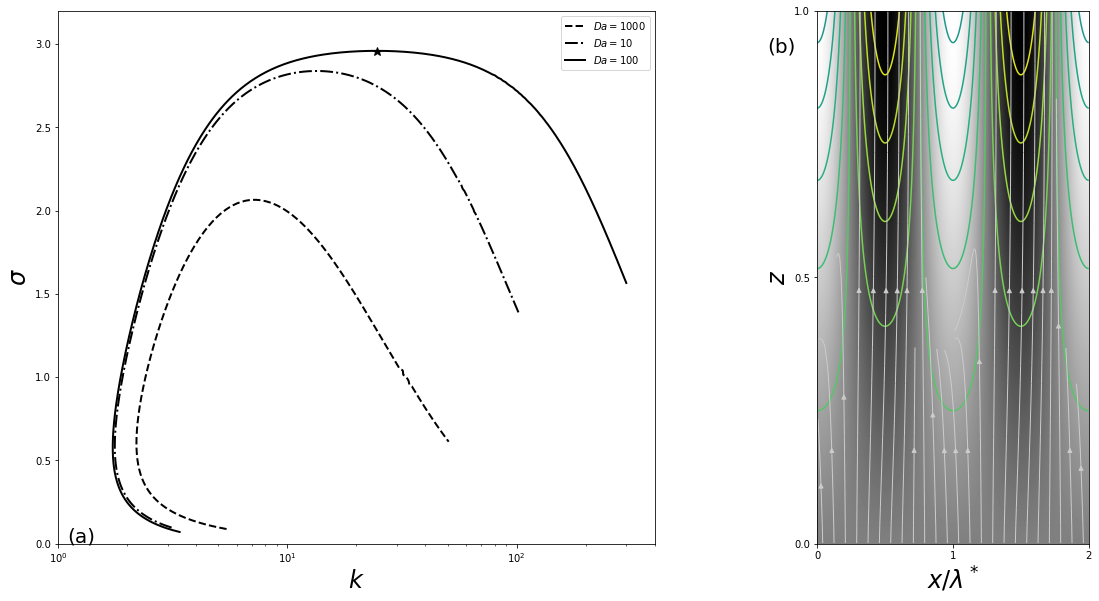

In [15]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(9.8 * zoom, 4.9 * zoom)
f.set_facecolor('w')

gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

ax0 = plt.subplot(gs[0])
ax0.plot(DC_a.k, DC_a.s, '--k', linewidth=2, label=r'$Da=1000$')
ax0.plot(DC_b.k, DC_b.s, '-.k', linewidth=2, label=r'$Da=10$')
ax0.plot(DC_ref.k, DC_ref.s, '-k', linewidth=2, label=r'$Da=100$')
ax0.plot(DC_ref.k[iref], DC_ref.s[iref], '*k', MarkerSize=9)
ax0.set_xlabel(r'$k$', fontsize=24)
ax0.set_xscale('log')
ax0.set_xlim(1.0, 400.0)
ax0.set_xticks((1e0, 1e1, 1e2))
ax0.set_ylim(0.0, 3.2)
ax0.set_ylabel(r'$\sigma$', fontsize=24)
ax0.text(1.1, 0.1, '(a)', fontsize=20, verticalalignment='top', horizontalalignment='left')
ax0.legend()

ax1 = plt.subplot(gs[1])
ax1.imshow(np.flipud(P), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax1.contour(X, Z, phi, levels=np.linspace(-1, 1, 20))
nlines = 24
h = 2.0 * lambda_/(nlines+1.0)
seed = np.zeros((nlines, 2))
seed[:, 0] = np.linspace(0.5*h, 2.0*lambda_-0.5*h, nlines)
seed[:, 1] = np.ones_like(seed[:, 0]) / 1000.0
ax1.streamplot(X, Z, U, W, start_points=seed, integration_direction='forward', color=[0.8, 0.8, 0.8], linewidth=1)
ax1.set_xlabel(r'$x/\lambda^*$', fontsize=24)
ax1.set_xlim(0, 2.*lambda_)
ax1.set_xticks((0, lambda_, 2*lambda_))
ax1.set_xticklabels((0, 1, 2))
ax1.set_ylabel(r'$z$', fontsize=24)
ax1.set_ylim(0, 1)
ax1.set_yticks((0, 0.5, 1))
ax1.text(-0.04, 0.95, '(b)', fontsize=20, verticalalignment='top', horizontalalignment='right')

plt.show()

### The large-Damköhler number limit

Considering the asymptotic limit of large Damköhler number, we can reduce the polynomial \eqref{eq:characteristic-poly-cbs} to second order,
\begin{equation}
  \label{eq:characteristic-poly-quad}
  \left(\sigma\Kk - \frac{\permexp}{\Da\stiff}\right)m^2
  - \left(\frac{\permexp\Kk}{\stiff} +
    \frac{\sigma }{\Da}k^2\right)m + 
  \left(\permexp - \sigma\Kk\right)k^2 = 0.
\end{equation}

The function `characteristic_polynomial` above already includes this case and evaluatees the coefficients of the both characteristic polynomial \eqref{eq:characteristic-poly-cbs} and \eqref{eq:characteristic-poly-quad}.

In [16]:
Lkbounds = np.log10([0.1, 400.0])
sbounds = np.asarray([0.05, 4.0])
init_Lks = np.asarray([np.log10(5.0), 3.0])
DC_cube = {}
DC_quad = {}

for vals in [10., 100., 1000.]:
    par = PAR(Da_=vals, largeDa_=False)
    DC_cube[vals] = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)

    par = PAR(Da_=vals, largeDa_=True)
    DC_quad[vals] = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)

SUCCESS: monotonic eigenfunction for k=5.000000000000001, sigma=1.9700163558867765
Iteration 1: searching for solution at k=4.886186104779054
SUCCESS: monotonic eigenfunction for k=4.886186104779054, sigma=1.9570167816517678
Iteration 2: searching for solution at k=4.818066292998758
SUCCESS: monotonic eigenfunction for k=4.818066292998758, sigma=1.9486469892766827
Iteration 3: searching for solution at k=4.754040003771168
SUCCESS: monotonic eigenfunction for k=4.754040003771168, sigma=1.9403553170435563
Iteration 4: searching for solution at k=4.692426291378214
SUCCESS: monotonic eigenfunction for k=4.692426291378214, sigma=1.9319700450992363
Iteration 5: searching for solution at k=4.633064371552892
SUCCESS: monotonic eigenfunction for k=4.633064371552892, sigma=1.9234983480123409
Iteration 6: searching for solution at k=4.5758148172813105
SUCCESS: monotonic eigenfunction for k=4.5758148172813105, sigma=1.9149475845022907
Iteration 7: searching for solution at k=4.520549371340002
SUCC

SUCCESS: monotonic eigenfunction for k=2.9207714252179886, sigma=1.3987133986216935
Iteration 62: searching for solution at k=2.9039132773538574
SUCCESS: monotonic eigenfunction for k=2.9039132773538574, sigma=1.388986553341307
Iteration 63: searching for solution at k=2.8873073341723305
SUCCESS: monotonic eigenfunction for k=2.8873073341723305, sigma=1.3792538595402484
Iteration 64: searching for solution at k=2.87094845215095
SUCCESS: monotonic eigenfunction for k=2.87094845215095, sigma=1.3695154234075526
Iteration 65: searching for solution at k=2.8548316993555907
SUCCESS: monotonic eigenfunction for k=2.8548316993555907, sigma=1.3597713443328892
Iteration 66: searching for solution at k=2.838952347286206
SUCCESS: monotonic eigenfunction for k=2.838952347286206, sigma=1.3500217151417906
Iteration 67: searching for solution at k=2.823305863236351
SUCCESS: monotonic eigenfunction for k=2.823305863236351, sigma=1.340266622309983
Iteration 68: searching for solution at k=2.807887903136

SUCCESS: monotonic eigenfunction for k=2.2514400744614735, sigma=0.7952495356617809
Iteration 123: searching for solution at k=2.2460568201002693
SUCCESS: monotonic eigenfunction for k=2.2460568201002693, sigma=0.785104703985472
Iteration 124: searching for solution at k=2.2408880341772797
SUCCESS: monotonic eigenfunction for k=2.2408880341772797, sigma=0.7749405454125572
Iteration 125: searching for solution at k=2.2359390674761093
SUCCESS: monotonic eigenfunction for k=2.2359390674761093, sigma=0.7647549300583495
Iteration 126: searching for solution at k=2.231215706180977
SUCCESS: monotonic eigenfunction for k=2.231215706180977, sigma=0.7545452750089868
Iteration 127: searching for solution at k=2.226724211978989
SUCCESS: monotonic eigenfunction for k=2.226724211978989, sigma=0.7443084041151938
Iteration 128: searching for solution at k=2.2224713693666436
SUCCESS: monotonic eigenfunction for k=2.2224713693666436, sigma=0.7340403489047973
Iteration 129: searching for solution at k=2.

SUCCESS: monotonic eigenfunction for k=2.6429375827710544, sigma=0.2696119153031543
Iteration 178: searching for solution at k=2.678246569762177
SUCCESS: monotonic eigenfunction for k=2.678246569762177, sigma=0.26167470340916216
Iteration 179: searching for solution at k=2.7154667569675945
SUCCESS: monotonic eigenfunction for k=2.7154667569675945, sigma=0.2538964612624246
Iteration 180: searching for solution at k=2.754638689963233
SUCCESS: monotonic eigenfunction for k=2.754638689963233, sigma=0.24628424430285917
Iteration 181: searching for solution at k=2.795798690536334
SUCCESS: monotonic eigenfunction for k=2.795798690536334, sigma=0.23884437930322364
Iteration 182: searching for solution at k=2.8389788840011714
SUCCESS: monotonic eigenfunction for k=2.8389788840011714, sigma=0.2315823699415709
Iteration 183: searching for solution at k=2.8842073575240548
SUCCESS: monotonic eigenfunction for k=2.8842073575240548, sigma=0.2245028229026245
Iteration 184: searching for solution at k=

SUCCESS: monotonic eigenfunction for k=5.393405914221006, sigma=2.006554947329292
Iteration 220: searching for solution at k=5.48331794312552
SUCCESS: monotonic eigenfunction for k=5.48331794312552, sigma=2.0132937670130375
Iteration 221: searching for solution at k=5.577564058747568
SUCCESS: monotonic eigenfunction for k=5.577564058747568, sigma=2.0197865324564193
Iteration 222: searching for solution at k=5.6764453734025055
SUCCESS: monotonic eigenfunction for k=5.6764453734025055, sigma=2.0260049820274597
Iteration 223: searching for solution at k=5.780272024861768
SUCCESS: monotonic eigenfunction for k=5.780272024861768, sigma=2.0319173097030236
Iteration 224: searching for solution at k=5.88935582680387
SUCCESS: monotonic eigenfunction for k=5.88935582680387, sigma=2.0374879466329086
Iteration 225: searching for solution at k=6.0039994129673415
SUCCESS: monotonic eigenfunction for k=6.0039994129673415, sigma=2.042677487529915
Iteration 226: searching for solution at k=6.1244810819

SUCCESS: monotonic eigenfunction for k=14.48600182610287, sigma=1.7703708732612318
Iteration 278: searching for solution at k=14.64962652472978
SUCCESS: monotonic eigenfunction for k=14.64962652472978, sigma=1.7615922279382563
Iteration 279: searching for solution at k=14.813654398587774
SUCCESS: monotonic eigenfunction for k=14.813654398587774, sigma=1.7527916791740121
Iteration 280: searching for solution at k=14.978114818013609
SUCCESS: monotonic eigenfunction for k=14.978114818013609, sigma=1.7439703356982856
Iteration 281: searching for solution at k=15.143036573978485
SUCCESS: monotonic eigenfunction for k=15.143036573978485, sigma=1.7351292367814857
Iteration 282: searching for solution at k=15.308447928546636
SUCCESS: monotonic eigenfunction for k=15.308447928546636, sigma=1.7262693579564055
Iteration 283: searching for solution at k=15.474376662479449
SUCCESS: monotonic eigenfunction for k=15.474376662479449, sigma=1.717391616180815
Iteration 284: searching for solution at k=1

SUCCESS: monotonic eigenfunction for k=26.16278392376278, sigma=1.2161667229456719
Iteration 339: searching for solution at k=26.400692355196142
SUCCESS: monotonic eigenfunction for k=26.400692355196142, sigma=1.206973194096563
Iteration 340: searching for solution at k=26.64080926402617
SUCCESS: monotonic eigenfunction for k=26.64080926402617, sigma=1.1977804888138661
Iteration 341: searching for solution at k=26.883178420723123
SUCCESS: monotonic eigenfunction for k=26.883178420723123, sigma=1.188588763016497
Iteration 342: searching for solution at k=27.12784454277445
SUCCESS: monotonic eigenfunction for k=27.12784454277445, sigma=1.179398172383557
Iteration 343: searching for solution at k=27.374853326656417
SUCCESS: monotonic eigenfunction for k=27.374853326656417, sigma=1.1702088724991389
Iteration 344: searching for solution at k=27.62425148083246
SUCCESS: monotonic eigenfunction for k=27.62425148083246, sigma=1.1610210189954662
Iteration 345: searching for solution at k=27.8760

SUCCESS: monotonic eigenfunction for k=37.198412338626106, sigma=0.8813194555832876
Iteration 373: searching for solution at k=37.55014147435615
FAILURE: no solution found for k=37.55014147435615
Iteration 373: searching for solution at k=37.55014147435615
FAILURE: no solution found for k=37.55014147435615
Iteration 373: searching for solution at sigma=0.8721928312731445
SUCCESS: monotonic eigenfunction for k=37.55106409072905, sigma=0.8721928312731445
Iteration 374: searching for solution at k=37.90765899676377
FAILURE: no solution found for k=37.90765899676377
Iteration 374: searching for solution at k=37.90765899676377
FAILURE: no solution found for k=37.90765899676377
Iteration 374: searching for solution at sigma=0.8630740830740523
SUCCESS: monotonic eigenfunction for k=37.90861418052889, sigma=0.8630740830740523
Iteration 375: searching for solution at k=38.27018715584238
FAILURE: no solution found for k=38.27018715584238
Iteration 375: searching for solution at k=38.270187155842

FAILURE: no solution found for k=46.78346496832992
Iteration 395: searching for solution at k=46.78346496832992
FAILURE: no solution found for k=46.78346496832992
Iteration 395: searching for solution at sigma=0.6738744767640027
SUCCESS: monotonic eigenfunction for k=46.78546242179079, sigma=0.6738744767640027
Iteration 396: searching for solution at k=47.28495389807136
FAILURE: no solution found for k=47.28495389807136
Iteration 396: searching for solution at k=47.28495389807136
FAILURE: no solution found for k=47.28495389807136
Iteration 396: searching for solution at sigma=0.6650014937134047
SUCCESS: monotonic eigenfunction for k=47.287025090667264, sigma=0.6650014937134047
Iteration 397: searching for solution at k=47.79512142484391
FAILURE: no solution found for k=47.79512142484391
Iteration 397: searching for solution at k=47.79512142484391
FAILURE: no solution found for k=47.79512142484391
Iteration 397: searching for solution at sigma=0.6561439218964814
SUCCESS: monotonic eigen

SUCCESS: monotonic eigenfunction for k=3.0699033188711224, sigma=1.8164964961798553
Iteration 41: searching for solution at k=3.0455397349274254
SUCCESS: monotonic eigenfunction for k=3.0455397349274254, sigma=1.807043967860102
Iteration 42: searching for solution at k=3.021688120940767
SUCCESS: monotonic eigenfunction for k=3.021688120940767, sigma=1.7975758920040044
Iteration 43: searching for solution at k=2.9983303644462187
SUCCESS: monotonic eigenfunction for k=2.9983303644462187, sigma=1.7880929316327876
Iteration 44: searching for solution at k=2.9754493305602674
SUCCESS: monotonic eigenfunction for k=2.9754493305602674, sigma=1.7785957059899669
Iteration 45: searching for solution at k=2.953028795886697
SUCCESS: monotonic eigenfunction for k=2.953028795886697, sigma=1.769084793985162
Iteration 46: searching for solution at k=2.9310533879564065
SUCCESS: monotonic eigenfunction for k=2.9310533879564065, sigma=1.7595607373030901
Iteration 47: searching for solution at k=2.90950852

SUCCESS: monotonic eigenfunction for k=2.1684539523192434, sigma=1.232961679176101
Iteration 101: searching for solution at k=2.159869677722311
SUCCESS: monotonic eigenfunction for k=2.159869677722311, sigma=1.223030591778404
Iteration 102: searching for solution at k=2.151451949622214
SUCCESS: monotonic eigenfunction for k=2.151451949622214, sigma=1.2130923698210856
Iteration 103: searching for solution at k=2.143200998577401
SUCCESS: monotonic eigenfunction for k=2.143200998577401, sigma=1.2031468271139618
Iteration 104: searching for solution at k=2.135117207513966
SUCCESS: monotonic eigenfunction for k=2.135117207513966, sigma=1.1931937582033754
Iteration 105: searching for solution at k=2.1272011159387842
SUCCESS: monotonic eigenfunction for k=2.1272011159387842, sigma=1.1832329363589682
Iteration 106: searching for solution at k=2.119453424668303
SUCCESS: monotonic eigenfunction for k=2.119453424668303, sigma=1.1732641112285473
Iteration 107: searching for solution at k=2.1118750

SUCCESS: monotonic eigenfunction for k=2.0440062734346793, sigma=0.6801254872549689
Iteration 157: searching for solution at k=2.053267657145219
SUCCESS: monotonic eigenfunction for k=2.053267657145219, sigma=0.6707218929723985
Iteration 158: searching for solution at k=2.063350909245516
SUCCESS: monotonic eigenfunction for k=2.063350909245516, sigma=0.6613400325454587
Iteration 159: searching for solution at k=2.0743015891767076
SUCCESS: monotonic eigenfunction for k=2.0743015891767076, sigma=0.6519856094213169
Iteration 160: searching for solution at k=2.086167587893341
SUCCESS: monotonic eigenfunction for k=2.086167587893341, sigma=0.6426645914586435
Iteration 161: searching for solution at k=2.0989991009097038
SUCCESS: monotonic eigenfunction for k=2.0989991009097038, sigma=0.633383266703449
Iteration 162: searching for solution at k=2.1128485589723405
SUCCESS: monotonic eigenfunction for k=2.1128485589723405, sigma=0.6241482899108445
Iteration 163: searching for solution at k=2.12

SUCCESS: monotonic eigenfunction for k=5.168860874100673, sigma=0.3480767921570292
Iteration 214: searching for solution at k=5.287128990650809
FAILURE: no solution found for k=5.287128990650809
Iteration 214: searching for solution at k=5.287128990650809
FAILURE: no solution found for k=5.287128990650809
Iteration 214: searching for solution at sigma=0.3462135259973457
SUCCESS: monotonic eigenfunction for k=5.2891841529326395, sigma=0.3462135259973457
Iteration 215: searching for solution at k=5.410350116416638
FAILURE: no solution found for k=5.410350116416638
Iteration 215: searching for solution at k=5.410350116416638
FAILURE: no solution found for k=5.410350116416638
Iteration 215: searching for solution at sigma=0.34441272357138125
SUCCESS: monotonic eigenfunction for k=5.412415917582895, sigma=0.34441272357138125
Iteration 216: searching for solution at k=5.536539838102269
SUCCESS: monotonic eigenfunction for k=5.536539838102269, sigma=0.3426981144713648
Iteration 217: searching

SUCCESS: monotonic eigenfunction for k=6.653858622863814, sigma=2.164479208238686
Iteration 247: searching for solution at k=6.79520793988987
SUCCESS: monotonic eigenfunction for k=6.79520793988987, sigma=2.1600257708629087
Iteration 248: searching for solution at k=6.935252709879812
SUCCESS: monotonic eigenfunction for k=6.935252709879812, sigma=2.155048746194321
Iteration 249: searching for solution at k=7.073727204593501
SUCCESS: monotonic eigenfunction for k=7.073727204593501, sigma=2.1496115519228427
Iteration 250: searching for solution at k=7.210475812868525
SUCCESS: monotonic eigenfunction for k=7.210475812868525, sigma=2.1437714736853013
Iteration 251: searching for solution at k=7.345426077305055
SUCCESS: monotonic eigenfunction for k=7.345426077305055, sigma=2.1375791337587424
Iteration 252: searching for solution at k=7.478565498648512
SUCCESS: monotonic eigenfunction for k=7.478565498648512, sigma=2.1310786381056253
Iteration 253: searching for solution at k=7.609923089407

SUCCESS: monotonic eigenfunction for k=13.779697320824054, sigma=1.6501260579048451
Iteration 308: searching for solution at k=13.896644739428256
SUCCESS: monotonic eigenfunction for k=13.896644739428256, sigma=1.6408050038895647
Iteration 309: searching for solution at k=14.014156363103513
SUCCESS: monotonic eigenfunction for k=14.014156363103513, sigma=1.63147972430807
Iteration 310: searching for solution at k=14.132253375817694
SUCCESS: monotonic eigenfunction for k=14.132253375817694, sigma=1.6221505072606455
Iteration 311: searching for solution at k=14.25095707820219
SUCCESS: monotonic eigenfunction for k=14.25095707820219, sigma=1.612817631167881
Iteration 312: searching for solution at k=14.370288908398102
SUCCESS: monotonic eigenfunction for k=14.370288908398102, sigma=1.6034813654592863
Iteration 313: searching for solution at k=14.490270462617229
SUCCESS: monotonic eigenfunction for k=14.490270462617229, sigma=1.5941419712163725
Iteration 314: searching for solution at k=14

SUCCESS: monotonic eigenfunction for k=22.493569989760847, sigma=1.1001526311252894
Iteration 367: searching for solution at k=22.693884623688373
SUCCESS: monotonic eigenfunction for k=22.693884623688373, sigma=1.0909504080659833
Iteration 368: searching for solution at k=22.89697511188029
SUCCESS: monotonic eigenfunction for k=22.89697511188029, sigma=1.0817567578695622
Iteration 369: searching for solution at k=23.102914756348973
SUCCESS: monotonic eigenfunction for k=23.102914756348973, sigma=1.0725719682623547
Iteration 370: searching for solution at k=23.311778998620877
SUCCESS: monotonic eigenfunction for k=23.311778998620877, sigma=1.0633963333326926
Iteration 371: searching for solution at k=23.523645484282017
SUCCESS: monotonic eigenfunction for k=23.523645484282017, sigma=1.0542301536957503
Iteration 372: searching for solution at k=23.738594128435256
SUCCESS: monotonic eigenfunction for k=23.738594128435256, sigma=1.0450737366514058
Iteration 373: searching for solution at k

SUCCESS: monotonic eigenfunction for k=43.895418314128754, sigma=0.5679680157431449
Iteration 428: searching for solution at k=44.503763551636936
SUCCESS: monotonic eigenfunction for k=44.503763551636936, sigma=0.55999430359557
Iteration 429: searching for solution at k=45.12486976989016
SUCCESS: monotonic eigenfunction for k=45.12486976989016, sigma=0.5520513941359662
Iteration 430: searching for solution at k=45.75900387493564
SUCCESS: monotonic eigenfunction for k=45.75900387493564, sigma=0.5441394020623829
Iteration 431: searching for solution at k=46.40643795837613
SUCCESS: monotonic eigenfunction for k=46.40643795837613, sigma=0.5362584348981163
Iteration 432: searching for solution at k=47.06744972894266
SUCCESS: monotonic eigenfunction for k=47.06744972894266, sigma=0.5284085953272577
Iteration 433: searching for solution at k=47.74232298401241
SUCCESS: monotonic eigenfunction for k=47.74232298401241, sigma=0.5205899837105737
Iteration 434: searching for solution at k=48.431348

SUCCESS: monotonic eigenfunction for k=3.261805462140537, sigma=2.1048703161175832
Iteration 48: searching for solution at k=3.239738165927911
SUCCESS: monotonic eigenfunction for k=3.239738165927911, sigma=2.0952703561089883
Iteration 49: searching for solution at k=3.2180059100490706
SUCCESS: monotonic eigenfunction for k=3.2180059100490706, sigma=2.085663222693404
Iteration 50: searching for solution at k=3.1966003592232886
SUCCESS: monotonic eigenfunction for k=3.1966003592232886, sigma=2.0760491239759715
Iteration 51: searching for solution at k=3.175513463898173
SUCCESS: monotonic eigenfunction for k=3.175513463898173, sigma=2.066428259808437
Iteration 52: searching for solution at k=3.154737448456283
SUCCESS: monotonic eigenfunction for k=3.154737448456283, sigma=2.056800822166005
Iteration 53: searching for solution at k=3.134264799992318
SUCCESS: monotonic eigenfunction for k=3.134264799992318, sigma=2.0471669955038925
Iteration 54: searching for solution at k=3.11408825763034

SUCCESS: monotonic eigenfunction for k=2.3194573981163065, sigma=1.5009678402917173
Iteration 110: searching for solution at k=2.3090525922127676
SUCCESS: monotonic eigenfunction for k=2.3090525922127676, sigma=1.4911311522706345
Iteration 111: searching for solution at k=2.2987533995076865
SUCCESS: monotonic eigenfunction for k=2.2987533995076865, sigma=1.4812922117476233
Iteration 112: searching for solution at k=2.28855857312773
SUCCESS: monotonic eigenfunction for k=2.28855857312773, sigma=1.471451029109383
Iteration 113: searching for solution at k=2.278466906876539
SUCCESS: monotonic eigenfunction for k=2.278466906876539, sigma=1.461607613340725
Iteration 114: searching for solution at k=2.26847723458086
SUCCESS: monotonic eigenfunction for k=2.26847723458086, sigma=1.4517619720210346
Iteration 115: searching for solution at k=2.2585884294784475
SUCCESS: monotonic eigenfunction for k=2.2585884294784475, sigma=1.4419141113184792
Iteration 116: searching for solution at k=2.2487994

SUCCESS: monotonic eigenfunction for k=1.847943452555097, sigma=0.8862018605286857
Iteration 172: searching for solution at k=1.8431805660912957
SUCCESS: monotonic eigenfunction for k=1.8431805660912957, sigma=0.8761622706828849
Iteration 173: searching for solution at k=1.8385235783746805
SUCCESS: monotonic eigenfunction for k=1.8385235783746805, sigma=0.8661149837657158
Iteration 174: searching for solution at k=1.8339744751345972
SUCCESS: monotonic eigenfunction for k=1.8339744751345972, sigma=0.856059522871181
Iteration 175: searching for solution at k=1.829535371513598
SUCCESS: monotonic eigenfunction for k=1.829535371513598, sigma=0.8459953561522067
Iteration 176: searching for solution at k=1.825208519899809
SUCCESS: monotonic eigenfunction for k=1.825208519899809, sigma=0.8359218876883765
Iteration 177: searching for solution at k=1.8209963184733269
SUCCESS: monotonic eigenfunction for k=1.8209963184733269, sigma=0.8258384463373414
Iteration 178: searching for solution at k=1.8

SUCCESS: monotonic eigenfunction for k=1.8915332024303484, sigma=0.33544056212122114
Iteration 228: searching for solution at k=1.9043198151067435
SUCCESS: monotonic eigenfunction for k=1.9043198151067435, sigma=0.32620196195379314
Iteration 229: searching for solution at k=1.9180280592251828
SUCCESS: monotonic eigenfunction for k=1.9180280592251828, sigma=0.31701702860997755
Iteration 230: searching for solution at k=1.9327072468030653
SUCCESS: monotonic eigenfunction for k=1.9327072468030653, sigma=0.3078925285511753
Iteration 231: searching for solution at k=1.9484083249945212
SUCCESS: monotonic eigenfunction for k=1.9484083249945212, sigma=0.2988356730892373
Iteration 232: searching for solution at k=1.9651836514121956
SUCCESS: monotonic eigenfunction for k=1.9651836514121956, sigma=0.2898541205148497
Iteration 233: searching for solution at k=1.9830867123667266
SUCCESS: monotonic eigenfunction for k=1.9830867123667266, sigma=0.28095596630256353
Iteration 234: searching for solutio

SUCCESS: monotonic eigenfunction for k=6.197830021680197, sigma=2.6770135580728245
Iteration 278: searching for solution at k=6.293996482690329
SUCCESS: monotonic eigenfunction for k=6.293996482690329, sigma=2.6843363214412386
Iteration 279: searching for solution at k=6.393313223895574
SUCCESS: monotonic eigenfunction for k=6.393313223895574, sigma=2.6915548958954996
Iteration 280: searching for solution at k=6.495906894767926
SUCCESS: monotonic eigenfunction for k=6.495906894767926, sigma=2.698664505651873
Iteration 281: searching for solution at k=6.601907881352531
SUCCESS: monotonic eigenfunction for k=6.601907881352531, sigma=2.7056602159080136
Iteration 282: searching for solution at k=6.711450137040172
SUCCESS: monotonic eigenfunction for k=6.711450137040172, sigma=2.712536940408047
Iteration 283: searching for solution at k=6.8246709712386275
SUCCESS: monotonic eigenfunction for k=6.8246709712386275, sigma=2.719289451208433
Iteration 284: searching for solution at k=6.941710794

SUCCESS: monotonic eigenfunction for k=20.65640340958341, sigma=2.7938714943940464
Iteration 336: searching for solution at k=21.08618435414257
SUCCESS: monotonic eigenfunction for k=21.08618435414257, sigma=2.7892683096305113
Iteration 337: searching for solution at k=21.519868241371196
SUCCESS: monotonic eigenfunction for k=21.519868241371196, sigma=2.7844680807305338
Iteration 338: searching for solution at k=21.95718836179837
SUCCESS: monotonic eigenfunction for k=21.95718836179837, sigma=2.779476009513052
Iteration 339: searching for solution at k=22.39787931245349
SUCCESS: monotonic eigenfunction for k=22.39787931245349, sigma=2.774297483184007
Iteration 340: searching for solution at k=22.84167879848014
SUCCESS: monotonic eigenfunction for k=22.84167879848014, sigma=2.7689380443902656
Iteration 341: searching for solution at k=23.288329321454658
SUCCESS: monotonic eigenfunction for k=23.288329321454658, sigma=2.7634033599337484
Iteration 342: searching for solution at k=23.73757

SUCCESS: monotonic eigenfunction for k=46.80647157843703, sigma=2.356620928833808
Iteration 393: searching for solution at k=47.266787086323724
SUCCESS: monotonic eigenfunction for k=47.266787086323724, sigma=2.3475187197624523
Iteration 394: searching for solution at k=47.72734981852093
SUCCESS: monotonic eigenfunction for k=47.72734981852093, sigma=2.338399301219917
Iteration 395: searching for solution at k=48.188192635452474
SUCCESS: monotonic eigenfunction for k=48.188192635452474, sigma=2.3292633273440857
Iteration 396: searching for solution at k=48.649348593398635
SUCCESS: monotonic eigenfunction for k=48.649348593398635, sigma=2.3201114226293726
Iteration 397: searching for solution at k=49.11085091976933
SUCCESS: monotonic eigenfunction for k=49.11085091976933, sigma=2.3109441835198745
Iteration 398: searching for solution at k=49.572732991661745
SUCCESS: monotonic eigenfunction for k=49.572732991661745, sigma=2.3017621799097534
Iteration 399: searching for solution at k=50.0

FAILURE: no solution found for k=64.27925644817367
Iteration 426: searching for solution at sigma=2.016939534230267
SUCCESS: monotonic eigenfunction for k=64.27807197576506, sigma=2.016939534230267
Iteration 427: searching for solution at k=64.76605996244501
FAILURE: non-monotonic eigenfunction for k=64.76605996244501, sigma=1.9872379964080045
Iteration 427: searching for solution at k=64.76605996244501
FAILURE: non-monotonic eigenfunction for k=64.76605996244501, sigma=1.9872379964080045
Iteration 427: searching for solution at sigma=2.0074943583495797
SUCCESS: monotonic eigenfunction for k=64.76489849026514, sigma=2.0074943583495797
Iteration 428: searching for solution at k=65.25446388723005
SUCCESS: monotonic eigenfunction for k=65.25446388723005, sigma=1.9930503683142973
Iteration 429: searching for solution at k=65.52206336688049
FAILURE: no solution found for k=65.52206336688049
Iteration 429: searching for solution at k=65.52206336688049
FAILURE: no solution found for k=65.5220

FAILURE: no solution found for k=76.21589521911645
Iteration 449: searching for solution at sigma=1.7938711662276097
SUCCESS: monotonic eigenfunction for k=76.21520934589071, sigma=1.7938711662276097
Iteration 450: searching for solution at k=76.75033695919055
FAILURE: no solution found for k=76.75033695919055
Iteration 450: searching for solution at k=76.75033695919055
FAILURE: no solution found for k=76.75033695919055
Iteration 450: searching for solution at sigma=1.7843440109574253
SUCCESS: monotonic eigenfunction for k=76.74967131933167, sigma=1.7843440109574253
Iteration 451: searching for solution at k=77.28731120959205
FAILURE: no solution found for k=77.28731120959205
Iteration 451: searching for solution at k=77.28731120959205
FAILURE: no solution found for k=77.28731120959205
Iteration 451: searching for solution at sigma=1.7748146357328265
SUCCESS: monotonic eigenfunction for k=77.28666580467488, sigma=1.7748146357328265
Iteration 452: searching for solution at k=77.82686369

FAILURE: no solution found for k=89.23595947296924
Iteration 472: searching for solution at sigma=1.5743256127577554
SUCCESS: monotonic eigenfunction for k=89.23575633781628, sigma=1.5743256127577554
Iteration 473: searching for solution at k=89.84150317004939
FAILURE: no solution found for k=89.84150317004939
Iteration 473: searching for solution at k=89.84150317004939
FAILURE: no solution found for k=89.84150317004939
Iteration 473: searching for solution at sigma=1.5647669743778405
SUCCESS: monotonic eigenfunction for k=89.84132277632347, sigma=1.5647669743778405
Iteration 474: searching for solution at k=90.4508261122974
FAILURE: no solution found for k=90.4508261122974
Iteration 474: searching for solution at k=90.4508261122974
FAILURE: no solution found for k=90.4508261122974
Iteration 474: searching for solution at sigma=1.5552078134832152
SUCCESS: monotonic eigenfunction for k=90.45066869733338, sigma=1.5552078134832152
Iteration 475: searching for solution at k=91.063993970919

FAILURE: no solution found for k=103.54174854717154
Iteration 494: searching for solution at sigma=1.3640148369963743
FAILURE: non-monotonic eigenfunction for k=103.54212183782042, sigma=1.3640148369963743
SUCCESS: monotonic eigenfunction for k=5.000000000000001, sigma=2.563716119445309
Iteration 1: searching for solution at k=4.886186104779054
SUCCESS: monotonic eigenfunction for k=4.886186104779054, sigma=2.54730754999635
Iteration 2: searching for solution at k=4.827985004202135
SUCCESS: monotonic eigenfunction for k=4.827985004202135, sigma=2.5385029250084656
Iteration 3: searching for solution at k=4.772181680842957
SUCCESS: monotonic eigenfunction for k=4.772181680842957, sigma=2.5297837596991264
Iteration 4: searching for solution at k=4.717847157167252
SUCCESS: monotonic eigenfunction for k=4.717847157167252, sigma=2.521022676859822
Iteration 5: searching for solution at k=4.664922052376145
SUCCESS: monotonic eigenfunction for k=4.664922052376145, sigma=2.5122211730788955
Itera

SUCCESS: monotonic eigenfunction for k=3.0295894564649677, sigma=2.025319298289749
Iteration 58: searching for solution at k=3.010453445529907
SUCCESS: monotonic eigenfunction for k=3.010453445529907, sigma=2.0156650707616266
Iteration 59: searching for solution at k=2.991585494718898
SUCCESS: monotonic eigenfunction for k=2.991585494718898, sigma=2.0060051847792137
Iteration 60: searching for solution at k=2.97297946852499
SUCCESS: monotonic eigenfunction for k=2.97297946852499, sigma=1.9963397888994487
Iteration 61: searching for solution at k=2.9546294297023894
SUCCESS: monotonic eigenfunction for k=2.9546294297023894, sigma=1.9866690260503337
Iteration 62: searching for solution at k=2.9365296316086837
SUCCESS: monotonic eigenfunction for k=2.9365296316086837, sigma=1.9769930337678463
Iteration 63: searching for solution at k=2.9186745109011154
SUCCESS: monotonic eigenfunction for k=2.9186745109011154, sigma=1.9673119444206146
Iteration 64: searching for solution at k=2.90105868056

SUCCESS: monotonic eigenfunction for k=2.2231676992986347, sigma=1.449162971827151
Iteration 117: searching for solution at k=2.2135145216835985
SUCCESS: monotonic eigenfunction for k=2.2135145216835985, sigma=1.4393131453890673
Iteration 118: searching for solution at k=2.203959547054905
SUCCESS: monotonic eigenfunction for k=2.203959547054905, sigma=1.4294610581956442
Iteration 119: searching for solution at k=2.194501780176978
FAILURE: no solution found for k=2.194501780176978
Iteration 119: searching for solution at k=2.194501780176978
FAILURE: no solution found for k=2.194501780176978
Iteration 119: searching for solution at sigma=1.4196370131437226
SUCCESS: monotonic eigenfunction for k=2.194530711180827, sigma=1.4196370131437226
Iteration 120: searching for solution at k=2.1851689854692595
SUCCESS: monotonic eigenfunction for k=2.1851689854692595, sigma=1.4097805037310955
Iteration 121: searching for solution at k=2.1759025060747788
SUCCESS: monotonic eigenfunction for k=2.17590

SUCCESS: monotonic eigenfunction for k=1.8022063442679153, sigma=0.8531434804832797
Iteration 177: searching for solution at k=1.7980377913170822
SUCCESS: monotonic eigenfunction for k=1.7980377913170822, sigma=0.8430588172664553
Iteration 178: searching for solution at k=1.7939863702130003
SUCCESS: monotonic eigenfunction for k=1.7939863702130003, sigma=0.8329632486519568
Iteration 179: searching for solution at k=1.7900548004811316
SUCCESS: monotonic eigenfunction for k=1.7900548004811316, sigma=0.8228558891871066
Iteration 180: searching for solution at k=1.7862459790730278
SUCCESS: monotonic eigenfunction for k=1.7862459790730278, sigma=0.8127357220803405
Iteration 181: searching for solution at k=1.7825629929894151
SUCCESS: monotonic eigenfunction for k=1.7825629929894151, sigma=0.8026015710096035
Iteration 182: searching for solution at k=1.7790091333414102
SUCCESS: monotonic eigenfunction for k=1.7790091333414102, sigma=0.792452063889674
Iteration 183: searching for solution at 

SUCCESS: monotonic eigenfunction for k=1.936831139689652, sigma=0.3110828858910993
Iteration 233: searching for solution at k=1.9542302326887147
SUCCESS: monotonic eigenfunction for k=1.9542302326887147, sigma=0.3021618333211721
Iteration 234: searching for solution at k=1.9727792635195291
SUCCESS: monotonic eigenfunction for k=1.9727792635195291, sigma=0.2933301102197715
Iteration 235: searching for solution at k=1.9925316657303787
SUCCESS: monotonic eigenfunction for k=1.9925316657303787, sigma=0.2845964273260299
Iteration 236: searching for solution at k=2.0135409496212513
SUCCESS: monotonic eigenfunction for k=2.0135409496212513, sigma=0.27596982303509265
Iteration 237: searching for solution at k=2.0358602421488126
SUCCESS: monotonic eigenfunction for k=2.0358602421488126, sigma=0.2674595955961951
Iteration 238: searching for solution at k=2.059541794800905
SUCCESS: monotonic eigenfunction for k=2.059541794800905, sigma=0.2590752177923063
Iteration 239: searching for solution at k

FAILURE: no solution found for k=6.1336434125664
Iteration 292: searching for solution at k=6.1336434125664
FAILURE: no solution found for k=6.1336434125664
Iteration 292: searching for solution at sigma=0.050514401730372256
SUCCESS: monotonic eigenfunction for k=6.136985208698685, sigma=0.050514401730372256
Iteration 293: searching for solution at k=5.060733068700652
SUCCESS: monotonic eigenfunction for k=5.060733068700652, sigma=2.5720568684343617
Iteration 294: searching for solution at k=5.123612385977638
SUCCESS: monotonic eigenfunction for k=5.123612385977638, sigma=2.580404117079588
Iteration 295: searching for solution at k=5.188281426674097
SUCCESS: monotonic eigenfunction for k=5.188281426674097, sigma=2.5886958014513586
Iteration 296: searching for solution at k=5.254812866082817
SUCCESS: monotonic eigenfunction for k=5.254812866082817, sigma=2.596929240714434
Iteration 297: searching for solution at k=5.3232832453332675
SUCCESS: monotonic eigenfunction for k=5.3232832453332

SUCCESS: monotonic eigenfunction for k=15.773313056676479, sigma=2.835719372840374
Iteration 354: searching for solution at k=16.134670910668497
SUCCESS: monotonic eigenfunction for k=16.134670910668497, sigma=2.8337874201230138
Iteration 355: searching for solution at k=16.502546016358806
SUCCESS: monotonic eigenfunction for k=16.502546016358806, sigma=2.8316190953716225
Iteration 356: searching for solution at k=16.876791766535586
SUCCESS: monotonic eigenfunction for k=16.876791766535586, sigma=2.829216046900142
Iteration 357: searching for solution at k=17.257245332143476
SUCCESS: monotonic eigenfunction for k=17.257245332143476, sigma=2.8265801888108255
Iteration 358: searching for solution at k=17.64372807136417
SUCCESS: monotonic eigenfunction for k=17.64372807136417, sigma=2.8237137161258645
Iteration 359: searching for solution at k=18.036046166310655
SUCCESS: monotonic eigenfunction for k=18.036046166310655, sigma=2.8206191176213635
Iteration 360: searching for solution at k=1

SUCCESS: monotonic eigenfunction for k=42.766258451273636, sigma=2.43205579990127
Iteration 415: searching for solution at k=43.220307897277216
SUCCESS: monotonic eigenfunction for k=43.220307897277216, sigma=2.4231107521645825
Iteration 416: searching for solution at k=43.67432640786922
SUCCESS: monotonic eigenfunction for k=43.67432640786922, sigma=2.4141421311499687
Iteration 417: searching for solution at k=44.12834556105166
SUCCESS: monotonic eigenfunction for k=44.12834556105166, sigma=2.4051509022082915
Iteration 418: searching for solution at k=44.58239746793578
SUCCESS: monotonic eigenfunction for k=44.58239746793578, sigma=2.396137983671655
Iteration 419: searching for solution at k=45.03651470641703
SUCCESS: monotonic eigenfunction for k=45.03651470641703, sigma=2.387104249466652
Iteration 420: searching for solution at k=45.49073026191037
SUCCESS: monotonic eigenfunction for k=45.49073026191037, sigma=2.3780505315776512
Iteration 421: searching for solution at k=45.94507747

FAILURE: no solution found for k=66.59225041455265
Iteration 465: searching for solution at sigma=1.9584491182048243
FAILURE: no solution found for k=[63.85419802 64.21266376 64.57314187 64.93564363 65.3001804  65.66676363
 66.03540478 66.40611541 66.77890715 67.15379167 67.53078072 67.90988613
 68.29111976 68.67449356 69.06001956 69.44770982]
SUCCESS: monotonic eigenfunction for k=5.000000000000001, sigma=2.596489830144003
Iteration 1: searching for solution at k=4.886186104779054
SUCCESS: monotonic eigenfunction for k=4.886186104779054, sigma=2.5793461640905706
Iteration 2: searching for solution at k=4.8298258486684915
SUCCESS: monotonic eigenfunction for k=4.8298258486684915, sigma=2.57045525456229
Iteration 3: searching for solution at k=4.77570019745004
SUCCESS: monotonic eigenfunction for k=4.77570019745004, sigma=2.5616530658570715
Iteration 4: searching for solution at k=4.7229374259332095
SUCCESS: monotonic eigenfunction for k=4.7229374259332095, sigma=2.5528139088490143
Iter

SUCCESS: monotonic eigenfunction for k=3.0190647462210927, sigma=2.0364314656429285
Iteration 60: searching for solution at k=3.000457893037922
SUCCESS: monotonic eigenfunction for k=3.000457893037922, sigma=2.0267600962606216
Iteration 61: searching for solution at k=2.9821028283150945
SUCCESS: monotonic eigenfunction for k=2.9821028283150945, sigma=2.0170835844534043
Iteration 62: searching for solution at k=2.9639939824961408
SUCCESS: monotonic eigenfunction for k=2.9639939824961408, sigma=2.0074020604547544
Iteration 63: searching for solution at k=2.946125959445914
SUCCESS: monotonic eigenfunction for k=2.946125959445914, sigma=1.9977156497515944
Iteration 64: searching for solution at k=2.9284935300215
SUCCESS: monotonic eigenfunction for k=2.9284935300215, sigma=1.9880244732748926
Iteration 65: searching for solution at k=2.911091625927486
SUCCESS: monotonic eigenfunction for k=2.911091625927486, sigma=1.9783286475808557
Iteration 66: searching for solution at k=2.89391533384175

SUCCESS: monotonic eigenfunction for k=2.2270825745299168, sigma=1.4597465185876184
Iteration 119: searching for solution at k=2.21749729193307
SUCCESS: monotonic eigenfunction for k=2.21749729193307, sigma=1.449895104331992
Iteration 120: searching for solution at k=2.2080062322000464
SUCCESS: monotonic eigenfunction for k=2.2080062322000464, sigma=1.4400416077527871
Iteration 121: searching for solution at k=2.198608429974093
SUCCESS: monotonic eigenfunction for k=2.198608429974093, sigma=1.4301860311836299
Iteration 122: searching for solution at k=2.189302954195696
SUCCESS: monotonic eigenfunction for k=2.189302954195696, sigma=1.4203283756343439
Iteration 123: searching for solution at k=2.180088907719179
SUCCESS: monotonic eigenfunction for k=2.180088907719179, sigma=1.4104686407760079
Iteration 124: searching for solution at k=2.1709654269636625
SUCCESS: monotonic eigenfunction for k=2.1709654269636625, sigma=1.4006068249236672
Iteration 125: searching for solution at k=2.161931

SUCCESS: monotonic eigenfunction for k=1.8161494995133163, sigma=0.8942322119977799
Iteration 176: searching for solution at k=1.811408959431238
SUCCESS: monotonic eigenfunction for k=1.811408959431238, sigma=0.8842013509494759
Iteration 177: searching for solution at k=1.8067676381968854
SUCCESS: monotonic eigenfunction for k=1.8067676381968854, sigma=0.8741634635426274
Iteration 178: searching for solution at k=1.8022273167477263
SUCCESS: monotonic eigenfunction for k=1.8022273167477263, sigma=0.8641181389042176
Iteration 179: searching for solution at k=1.7977898907047465
SUCCESS: monotonic eigenfunction for k=1.7977898907047465, sigma=0.8540649216851127
Iteration 180: searching for solution at k=1.7934573770581845
SUCCESS: monotonic eigenfunction for k=1.7934573770581845, sigma=0.8440033051194522
Iteration 181: searching for solution at k=1.789231921433876
SUCCESS: monotonic eigenfunction for k=1.789231921433876, sigma=0.8339327226432995
Iteration 182: searching for solution at k=1

SUCCESS: monotonic eigenfunction for k=1.8168293531822182, sigma=0.3590882669002882
Iteration 230: searching for solution at k=1.8265669797070296
SUCCESS: monotonic eigenfunction for k=1.8265669797070296, sigma=0.34970684824880616
Iteration 231: searching for solution at k=1.8370483397434019
SUCCESS: monotonic eigenfunction for k=1.8370483397434019, sigma=0.34035854602811827
Iteration 232: searching for solution at k=1.8483146513564606
SUCCESS: monotonic eigenfunction for k=1.8483146513564606, sigma=0.33104862994809753
Iteration 233: searching for solution at k=1.860409093908101
SUCCESS: monotonic eigenfunction for k=1.860409093908101, sigma=0.3217827325364915
Iteration 234: searching for solution at k=1.8733767541244355
SUCCESS: monotonic eigenfunction for k=1.8733767541244355, sigma=0.3125668783559171
Iteration 235: searching for solution at k=1.8872645342547272
SUCCESS: monotonic eigenfunction for k=1.8872645342547272, sigma=0.3034075073761858
Iteration 236: searching for solution a

SUCCESS: monotonic eigenfunction for k=3.2394471633702038, sigma=0.07658126376116571
Iteration 270: searching for solution at k=3.310143618198963
FAILURE: no solution found for k=3.310143618198963
Iteration 270: searching for solution at k=3.310143618198963
FAILURE: no solution found for k=3.310143618198963
Iteration 270: searching for solution at sigma=0.07310054998860212
SUCCESS: monotonic eigenfunction for k=3.312024069398587, sigma=0.07310054998860212
Iteration 271: searching for solution at k=3.3847485863580538
FAILURE: no solution found for k=3.3847485863580538
Iteration 271: searching for solution at k=3.3847485863580538
FAILURE: no solution found for k=3.3847485863580538
Iteration 271: searching for solution at sigma=0.0697777081580978
SUCCESS: monotonic eigenfunction for k=3.3866699643226283, sigma=0.0697777081580978
Iteration 272: searching for solution at k=3.4614471748521556
FAILURE: no solution found for k=3.4614471748521556
Iteration 272: searching for solution at k=3.461

SUCCESS: monotonic eigenfunction for k=11.665658243125462, sigma=2.913336056887695
Iteration 322: searching for solution at k=11.923027746241063
SUCCESS: monotonic eigenfunction for k=11.923027746241063, sigma=2.916456278126656
Iteration 323: searching for solution at k=12.187306941781522
SUCCESS: monotonic eigenfunction for k=12.187306941781522, sigma=2.919445020827524
Iteration 324: searching for solution at k=12.458622664553095
SUCCESS: monotonic eigenfunction for k=12.458622664553095, sigma=2.9223046691942915
Iteration 325: searching for solution at k=12.737104450944475
SUCCESS: monotonic eigenfunction for k=12.737104450944475, sigma=2.925037699981352
Iteration 326: searching for solution at k=13.022884806509095
SUCCESS: monotonic eigenfunction for k=13.022884806509095, sigma=2.9276466615917602
Iteration 327: searching for solution at k=13.316099458227818
SUCCESS: monotonic eigenfunction for k=13.316099458227818, sigma=2.930134153939837
Iteration 328: searching for solution at k=13

SUCCESS: monotonic eigenfunction for k=42.693799612093876, sigma=2.935632010475406
Iteration 379: searching for solution at k=43.6650158190177
SUCCESS: monotonic eigenfunction for k=43.6650158190177, sigma=2.9334320715106803
Iteration 380: searching for solution at k=44.655721790206634
SUCCESS: monotonic eigenfunction for k=44.655721790206634, sigma=2.9311178279220607
Iteration 381: searching for solution at k=45.66603290421845
SUCCESS: monotonic eigenfunction for k=45.66603290421845, sigma=2.9286866604415294
Iteration 382: searching for solution at k=46.69603770155946
SUCCESS: monotonic eigenfunction for k=46.69603770155946, sigma=2.926135952860536
Iteration 383: searching for solution at k=47.74579560165704
SUCCESS: monotonic eigenfunction for k=47.74579560165704, sigma=2.923463108929129
Iteration 384: searching for solution at k=48.81533464288237
SUCCESS: monotonic eigenfunction for k=48.81533464288237, sigma=2.9206655703648137
Iteration 385: searching for solution at k=49.904649281

SUCCESS: monotonic eigenfunction for k=104.52873070353834, sigma=2.6971123364865974
Iteration 423: searching for solution at k=106.35740879670092
SUCCESS: monotonic eigenfunction for k=106.35740879670092, sigma=2.6858583716805353
Iteration 424: searching for solution at k=107.58623796751674
FAILURE: non-monotonic eigenfunction for k=107.58623796751674, sigma=2.674035446349707
Iteration 424: searching for solution at k=107.58623796751674
FAILURE: non-monotonic eigenfunction for k=107.58623796751674, sigma=2.674035446349707
Iteration 424: searching for solution at sigma=2.6770794052830618
SUCCESS: monotonic eigenfunction for k=108.3606709964764, sigma=2.6770794052830618
Iteration 425: searching for solution at k=110.1878194879858
SUCCESS: monotonic eigenfunction for k=110.1878194879858, sigma=2.6657446311792223
Iteration 426: searching for solution at k=111.42477161340254
SUCCESS: monotonic eigenfunction for k=111.42477161340254, sigma=2.659162580925253
Iteration 427: searching for solut

FAILURE: no solution found for k=141.81567179313137
Iteration 446: searching for solution at sigma=2.4878360211282993
SUCCESS: monotonic eigenfunction for k=141.80539383411372, sigma=2.4878360211282993
Iteration 447: searching for solution at k=143.3066827374274
FAILURE: non-monotonic eigenfunction for k=143.3066827374274, sigma=2.4622685948654177
Iteration 447: searching for solution at k=143.3066827374274
FAILURE: non-monotonic eigenfunction for k=143.3066827374274, sigma=2.4622685948654177
Iteration 447: searching for solution at sigma=2.4789431120750924
SUCCESS: monotonic eigenfunction for k=143.2966090998316, sigma=2.4789431120750924
Iteration 448: searching for solution at k=144.79727898331902
FAILURE: no solution found for k=144.79727898331902
Iteration 448: searching for solution at k=144.79727898331902
FAILURE: no solution found for k=144.79727898331902
Iteration 448: searching for solution at sigma=2.470025075484551
SUCCESS: monotonic eigenfunction for k=144.78740644013217, s

FAILURE: no solution found for k=174.6376018793587
Iteration 468: searching for solution at sigma=2.2875932761535
SUCCESS: monotonic eigenfunction for k=174.6308908057883, sigma=2.2875932761535
Iteration 469: searching for solution at k=176.13766923036704
FAILURE: no solution found for k=176.13766923036704
Iteration 469: searching for solution at k=176.13766923036704
FAILURE: no solution found for k=176.13766923036704
Iteration 469: searching for solution at sigma=2.2783153945642978
SUCCESS: monotonic eigenfunction for k=176.13108193271495, sigma=2.2783153945642978
Iteration 470: searching for solution at k=177.63919005977095
FAILURE: no solution found for k=177.63919005977095
Iteration 470: searching for solution at k=177.63919005977095
FAILURE: no solution found for k=177.63919005977095
Iteration 470: searching for solution at sigma=2.269026146457919
SUCCESS: monotonic eigenfunction for k=177.63272400440943, sigma=2.269026146457919
Iteration 471: searching for solution at k=179.14226

FAILURE: no solution found for k=208.1307770921261
Iteration 490: searching for solution at sigma=2.0813411969850746
SUCCESS: monotonic eigenfunction for k=208.12631956401412, sigma=2.0813411969850746
Iteration 491: searching for solution at k=209.6864448964979
FAILURE: no solution found for k=209.6864448964979
Iteration 491: searching for solution at k=209.6864448964979
FAILURE: no solution found for k=209.6864448964979
Iteration 491: searching for solution at sigma=2.071881761928446
SUCCESS: monotonic eigenfunction for k=209.6820719036786, sigma=2.071881761928446
Iteration 492: searching for solution at k=211.24586119815146
FAILURE: no solution found for k=211.24586119815146
Iteration 492: searching for solution at k=211.24586119815146
FAILURE: no solution found for k=211.24586119815146
Iteration 492: searching for solution at sigma=2.0624167058107084
SUCCESS: monotonic eigenfunction for k=211.24157162648834, sigma=2.0624167058107084
Iteration 493: searching for solution at k=212.809

FAILURE: no solution found for k=243.39806213187447
Iteration 512: searching for solution at k=243.39806213187447
FAILURE: no solution found for k=243.39806213187447
Iteration 512: searching for solution at sigma=1.8721667024407778
SUCCESS: monotonic eigenfunction for k=243.3952718882201, sigma=1.8721667024407778
Iteration 513: searching for solution at k=245.06311537302147
FAILURE: no solution found for k=245.06311537302147
Iteration 513: searching for solution at k=245.06311537302147
FAILURE: no solution found for k=245.06311537302147
Iteration 513: searching for solution at sigma=1.8626166224683303
SUCCESS: monotonic eigenfunction for k=245.06039454679484, sigma=1.8626166224683303
Iteration 514: searching for solution at k=246.73456707474227
FAILURE: no solution found for k=246.73456707474227
Iteration 514: searching for solution at k=246.73456707474227
FAILURE: no solution found for k=246.73456707474227
Iteration 514: searching for solution at sigma=1.8530637699021522
SUCCESS: mono

FAILURE: no solution found for k=281.7260661245663
Iteration 534: searching for solution at k=281.7260661245663
FAILURE: no solution found for k=281.7260661245663
Iteration 534: searching for solution at sigma=1.6615582460519427
SUCCESS: monotonic eigenfunction for k=281.7247881677192, sigma=1.6615582460519427
Iteration 535: searching for solution at k=283.56555728960876
FAILURE: no solution found for k=283.56555728960876
Iteration 535: searching for solution at k=283.56555728960876
FAILURE: no solution found for k=283.56555728960876
Iteration 535: searching for solution at sigma=1.6519665796881875
SUCCESS: monotonic eigenfunction for k=283.56435001094894, sigma=1.6519665796881875
Iteration 536: searching for solution at k=285.41482879677443
FAILURE: no solution found for k=285.41482879677443
Iteration 536: searching for solution at k=285.41482879677443
FAILURE: no solution found for k=285.41482879677443
Iteration 536: searching for solution at sigma=1.642373877645368
SUCCESS: monotoni

SUCCESS: monotonic eigenfunction for k=3.7600124516209923, sigma=2.334178255186206
Iteration 29: searching for solution at k=3.729427711652709
SUCCESS: monotonic eigenfunction for k=3.729427711652709, sigma=2.324772270357413
Iteration 30: searching for solution at k=3.6994098102173254
SUCCESS: monotonic eigenfunction for k=3.6994098102173254, sigma=2.3153529591134157
Iteration 31: searching for solution at k=3.6699420076294684
SUCCESS: monotonic eigenfunction for k=3.6699420076294684, sigma=2.3059207849992793
Iteration 32: searching for solution at k=3.6410082083053834
SUCCESS: monotonic eigenfunction for k=3.6410082083053834, sigma=2.29647619121706
Iteration 33: searching for solution at k=3.6125929319100845
SUCCESS: monotonic eigenfunction for k=3.6125929319100845, sigma=2.287019601643327
Iteration 34: searching for solution at k=3.5846812859043906
SUCCESS: monotonic eigenfunction for k=3.5846812859043906, sigma=2.2775514217915442
Iteration 35: searching for solution at k=3.557258939

SUCCESS: monotonic eigenfunction for k=2.575337847303027, sigma=1.765599508350536
Iteration 88: searching for solution at k=2.5621366388665723
SUCCESS: monotonic eigenfunction for k=2.5621366388665723, sigma=1.755821419797979
Iteration 89: searching for solution at k=2.5490806204797556
SUCCESS: monotonic eigenfunction for k=2.5490806204797556, sigma=1.746040502829634
Iteration 90: searching for solution at k=2.5361673502236353
SUCCESS: monotonic eigenfunction for k=2.5361673502236353, sigma=1.7362568040497766
Iteration 91: searching for solution at k=2.523394453782979
SUCCESS: monotonic eigenfunction for k=2.523394453782979, sigma=1.7264703682491898
Iteration 92: searching for solution at k=2.5107596225064763
SUCCESS: monotonic eigenfunction for k=2.5107596225064763, sigma=1.7166812384515604
Iteration 93: searching for solution at k=2.4982606115462267
SUCCESS: monotonic eigenfunction for k=2.4982606115462267, sigma=1.7068894559573293
Iteration 94: searching for solution at k=2.48589523

SUCCESS: monotonic eigenfunction for k=1.9821953168403899, sigma=1.1748247781069951
Iteration 148: searching for solution at k=1.9750751567560665
SUCCESS: monotonic eigenfunction for k=1.9750751567560665, sigma=1.164908519766783
Iteration 149: searching for solution at k=1.9680345996027375
SUCCESS: monotonic eigenfunction for k=1.9680345996027375, sigma=1.1549895785194326
Iteration 150: searching for solution at k=1.9610736498597616
SUCCESS: monotonic eigenfunction for k=1.9610736498597616, sigma=1.1450678998190396
Iteration 151: searching for solution at k=1.9541923506163392
SUCCESS: monotonic eigenfunction for k=1.9541923506163392, sigma=1.135143425653618
Iteration 152: searching for solution at k=1.9473907844503762
SUCCESS: monotonic eigenfunction for k=1.9473907844503762, sigma=1.1252160943397496
Iteration 153: searching for solution at k=1.9406690743788888
SUCCESS: monotonic eigenfunction for k=1.9406690743788888, sigma=1.115285840297934
Iteration 154: searching for solution at k=

SUCCESS: monotonic eigenfunction for k=1.7272157009497924, sigma=0.5817502625291201
Iteration 206: searching for solution at k=1.727176118434208
FAILURE: no solution found for k=1.727176118434208
Iteration 206: searching for solution at k=1.727176118434208
FAILURE: no solution found for k=1.727176118434208
Iteration 206: searching for solution at sigma=0.5717501216310651
SUCCESS: monotonic eigenfunction for k=1.7273036181513066, sigma=0.5717501216310651
Iteration 207: searching for solution at k=1.727513356940925
SUCCESS: monotonic eigenfunction for k=1.727513356940925, sigma=0.5648116872369195
Iteration 208: searching for solution at k=1.727942258758453
SUCCESS: monotonic eigenfunction for k=1.727942258758453, sigma=0.5563175083587315
Iteration 209: searching for solution at k=1.7285785992234641
SUCCESS: monotonic eigenfunction for k=1.7285785992234641, sigma=0.5476935647726702
Iteration 210: searching for solution at k=1.7294526502965053
SUCCESS: monotonic eigenfunction for k=1.72945

SUCCESS: monotonic eigenfunction for k=2.895734362206959, sigma=0.09884661496961711
Iteration 265: searching for solution at k=2.9562720186483085
SUCCESS: monotonic eigenfunction for k=2.9562720186483085, sigma=0.09456509453410697
Iteration 266: searching for solution at k=3.0186885931392005
SUCCESS: monotonic eigenfunction for k=3.0186885931392005, sigma=0.09046371052564434
Iteration 267: searching for solution at k=3.0829984192505475
SUCCESS: monotonic eigenfunction for k=3.0829984192505475, sigma=0.08653686169192636
Iteration 268: searching for solution at k=3.149217443540105
SUCCESS: monotonic eigenfunction for k=3.149217443540105, sigma=0.08277879480762887
Iteration 269: searching for solution at k=3.2173633304722213
SUCCESS: monotonic eigenfunction for k=3.2173633304722213, sigma=0.07918366604305482
Iteration 270: searching for solution at k=3.2874555386800934
SUCCESS: monotonic eigenfunction for k=3.2874555386800934, sigma=0.0757455942733509
Iteration 271: searching for solution

SUCCESS: monotonic eigenfunction for k=10.061574411733371, sigma=2.8883114831064987
Iteration 323: searching for solution at k=10.274503838334763
SUCCESS: monotonic eigenfunction for k=10.274503838334763, sigma=2.892384642841797
Iteration 324: searching for solution at k=10.493512717164686
SUCCESS: monotonic eigenfunction for k=10.493512717164686, sigma=2.8963142153772146
Iteration 325: searching for solution at k=10.718717117386499
SUCCESS: monotonic eigenfunction for k=10.718717117386499, sigma=2.9001013818501398
Iteration 326: searching for solution at k=10.950233764898385
SUCCESS: monotonic eigenfunction for k=10.950233764898385, sigma=2.9037475579379577
Iteration 327: searching for solution at k=11.188180339095684
SUCCESS: monotonic eigenfunction for k=11.188180339095684, sigma=2.9072543755035487
Iteration 328: searching for solution at k=11.43267577726305
SUCCESS: monotonic eigenfunction for k=11.43267577726305, sigma=2.9106236628214397
Iteration 329: searching for solution at k=

SUCCESS: monotonic eigenfunction for k=40.84445405898573, sigma=2.939665313487696
Iteration 385: searching for solution at k=41.77784025656162
SUCCESS: monotonic eigenfunction for k=41.77784025656162, sigma=2.9376810035203307
Iteration 386: searching for solution at k=42.73041934077934
SUCCESS: monotonic eigenfunction for k=42.73041934077934, sigma=2.9355875218562906
Iteration 387: searching for solution at k=43.702352731536095
SUCCESS: monotonic eigenfunction for k=43.702352731536095, sigma=2.9333822853274336
Iteration 388: searching for solution at k=44.693779437810136
SUCCESS: monotonic eigenfunction for k=44.693779437810136, sigma=2.9310626841801777
Iteration 389: searching for solution at k=45.70481381513121
SUCCESS: monotonic eigenfunction for k=45.70481381513121, sigma=2.928626096638283
Iteration 390: searching for solution at k=46.735543289381596
SUCCESS: monotonic eigenfunction for k=46.735543289381596, sigma=2.926069904672138
Iteration 391: searching for solution at k=47.7860

FAILURE: no solution found for k=100.58712153951342
Iteration 430: searching for solution at sigma=2.7154314480148147
SUCCESS: monotonic eigenfunction for k=100.5684055771688, sigma=2.7154314480148147
Iteration 431: searching for solution at k=102.08963322099162
SUCCESS: monotonic eigenfunction for k=102.08963322099162, sigma=2.707756767991385
Iteration 432: searching for solution at k=103.61200014317345
FAILURE: no solution found for k=103.61200014317345
Iteration 432: searching for solution at k=103.61200014317345
FAILURE: no solution found for k=103.61200014317345
Iteration 432: searching for solution at sigma=2.700096050164809
SUCCESS: monotonic eigenfunction for k=103.59403630787456, sigma=2.700096050164809
Iteration 433: searching for solution at k=105.11697841145285
FAILURE: no solution found for k=105.11697841145285
Iteration 433: searching for solution at k=105.11697841145285
FAILURE: no solution found for k=105.11697841145285
Iteration 433: searching for solution at sigma=2.6

Figure below plots the dispersion curves for growth rate $\sigma$ as a function of wavenumber $\wavenumber$. Curves come from numerical solutions to the full problem (cubic polynomial \eqref{eq:characteristic-poly-cbs}, solid lines) and the large-$\Da$ problem (quadratic \eqref{eq:characteristic-poly-quad}, dashed lines). The agreement for $\Da \ge 100$ suggests that the large-Damköhler approximation is very good for geologically relevant conditions.

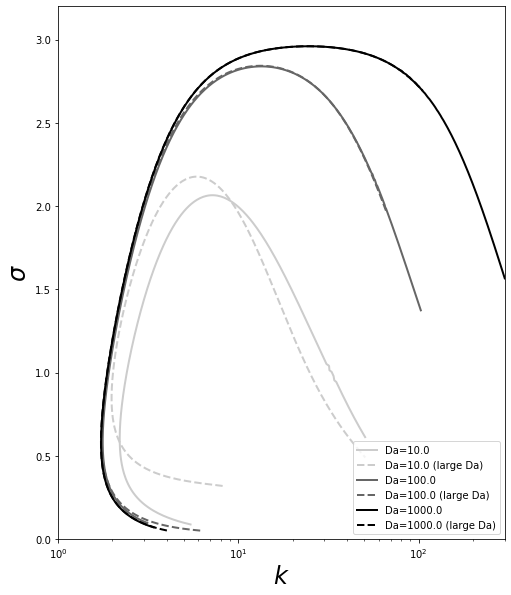

In [17]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.0 * zoom, 4.9 * zoom)
f.set_facecolor('w')

for vals, gray in zip([10., 100., 1000.], [0.8, 0.4, 0.0]):
    plt.plot(DC_cube[vals].k, DC_cube[vals].s, '-', linewidth=2, 
             color=[gray, gray, gray], label=r'Da='+str(vals))
    plt.plot(DC_quad[vals].k, DC_quad[vals].s, '--', linewidth=2, 
             color=[gray, gray, gray], label=r'Da=' + str(vals) + ' (large Da)')

plt.xscale('log')
plt.xlim(1, 300)
plt.xlabel(r'$k$', fontsize=24)
plt.ylim(0, 3.2)
plt.ylabel(r'$\sigma$', fontsize=24)
plt.legend()
plt.show()

### A modified problem and its analytical solution

It is possible to obtain an algebraic equation that can be solved for the growth-rate $\sigma$ as a function of wavenumber $k$ and parameters $\permexp,\Da,\Pe,\stiff$ (recall that $\Kk = 1 + k^2/(\Da\Pe)$). Without any approximations, the growth rate of $l=1$ perturbations is given by

\begin{multline}
  \label{eq:rxflow-analytical-sigma-full}
  \sigma = \pm\frac{\permexp}{\Kk}\left\{\left[ 
      \wavenumber^4\left(1 - \frac{\pi^2}{\Da^4\stiff^2\Kk^2} - 
        \frac{3}{\Da\stiff}\right) -
      \frac{\wavenumber^6}{\Da^3\stiff\Kk^2} -
      \wavenumber^2\left(\frac{\Kk^2}{\stiff^2} +
        \frac{2\pi^2}{\Da^2\stiff^2}\right) - 
      \frac{\pi^2\Kk^2}{\stiff^2}\right]^{1/2}\right. \\ 
  \left. \pm \left(\wavenumber^2 + \frac{2\pi^2 + k^2}{\Da\stiff}\right)\right\} 
  \left[2\left(\pi^2 + k^2\right) + 
    \frac{k^4}{2\Da^2\Kk^2}\right]^{-1}.
\end{multline}

The function `ReactiveFlowAnalyticalSolution` below takes $k, \permexp,\Da,\Pe,\stiff$ as arguments and evaluates the value of $\sigma$ given by equation \eqref{eq:rxflow-analytical-sigma-full}.

In [18]:
class PAR:
    def __init__(self):
        self.s = None
        self.k = None
        self.smax = None
        self.kmax = None
        self.X = None
        self.Y = None
        self.P = None
        self.phi = None
        self.U = None
        self.W = None

        
def ReactiveFlowAnalyticalSolution(k, n, Da, Pe, S):
    K = (1 + k**2 / Da / Pe).astype(np.clongdouble)
    b = np.pi
    # growth rate - upper branch
    full = np.zeros((k.shape[0], 2), dtype=np.clongdouble)
    b2 = b ** 2
    Da2 = Da ** 2
    Da3 = Da ** 3
    Da4 = Da ** 4
    K2 = K ** 2
    K4 = K ** 4
    k2 = k ** 2
    k4 = k ** 4
    k6 = k ** 6
    S2 = S ** 2
    full[:, 0] = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4
                                    - 3.0 * Da3 * K2 * S * k4 - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4)
                  + 4 * Da * K * b2 * n + Da * K * k2 * n + 2 * Da2 * K * S * k2 * n) / (
            4 * S * Da2 * K2 * b2 + 4 * S * Da2 * K2 * k2 + S * k4)
    # lower branch
    full[:, 1] = -(2.0 * n * np.sqrt(- Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4
                                     - 3 * Da3 * K2 * S * k4 - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4)
                   - K * (4 * Da * n * b2 + n * (2 * S * Da2 + Da) * k2)) / (
            S * (4 * Da2 * K2 * b2 + 4 * Da2 * K2 * k2 + k4))

    real1 = np.nonzero(np.imag(full[:, 0]).astype(np.float32) == 0.0)
    real2 = np.nonzero(np.imag(full[:, 1]).astype(np.float32) == 0.0)
    s = PAR()
    s.s = np.real(np.concatenate((np.flipud(full[real1, 0].flatten()), full[real2, 1].flatten())))
    s.k = np.real(np.concatenate((np.flipud(k[real1].flatten()), k[real2].flatten())))
    I = np.argmax(s.s)
    s.smax = s.s[I]
    s.kmax = s.k[I]

    # eigenfunctions
    K = 1 + s.kmax ** 2 / Da / Pe
    a = 0.5 * (n * K / S + s.smax * s.kmax ** 2 / Da) / (s.smax * K - n / Da / S)
    m = a + 1j * np.pi
    lambda_ = 2 * np.pi / s.kmax
    x = np.linspace(0, 2 * lambda_, 1000)
    hx = x[2]-x[1]
    y = np.linspace(0, 1, 1000)
    hy = y[2]-y[1]
    s.X, s.Y = np.meshgrid(x, y)
    s.P = np.exp(a * s.Y) * np.sin(np.pi * s.Y) * np.sin(s.kmax * s.X)
    tmp = np.exp(a * s.Y) * np.cos(np.pi * s.Y) * np.sin(s.kmax * s.X)
    dphi_dy = S * ((a ** 2 - np.pi ** 2 - s.kmax ** 2) * s.P + 2 * a * np.pi * tmp) / n
    s.phi = np.cumsum(dphi_dy, axis=0) * hy

    Px, Py = np.gradient(s.P, hx, hy)
    s.U = -S * Px
    s.W = (n - 1) * s.phi - S * Py

    s.P = (s.P - np.amin(s.P)) / (np.amax(s.P) - np.amin(s.P))
    s.phi = (s.phi - np.amin(s.phi)) / (np.amax(s.phi) - np.amin(s.phi))
    
    return s

In [19]:
n = 3.
Da = 1000.
Pe = 100.
S = np.asarray([0.01, 0.1, 1, 10]).astype(np.clongdouble)
k = np.logspace(-1.0, 4.0, 10000).astype(np.clongdouble)
s = []

for s_ in S:
    s.append(ReactiveFlowAnalyticalSolution(k, n, Da, Pe, s_))

Figure below plot the results for the modified problem with $\cmppres\first=0$ at $z=1$. __(a)__ Dispersion curves for $n=3$, $\Da=1000$, $\Pe=100$ and four values of $\stiff$. Maximum values of the growth rate for each curve are marked by stars. The eigenfunctions for each of these maxima are plotted in subsequent panels. __(b)__ The $\cmppres\first$ eigenfunction for $\stiff=1$. White curves are streamlines of the flow $\vel\liq = \zhat + \smallpar\vel\first$, with $\smallpar$ chosen to be $3\times10^{-3}$. __(c)__ $\cmppres\first$ for $\stiff=0.1$ with superimposed contours of the porosity perturbation $\por\first$. Porosity is larger in the low-pressure channels. __(d)__ $\cmppres\first$ for $\stiff=0.01$.

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


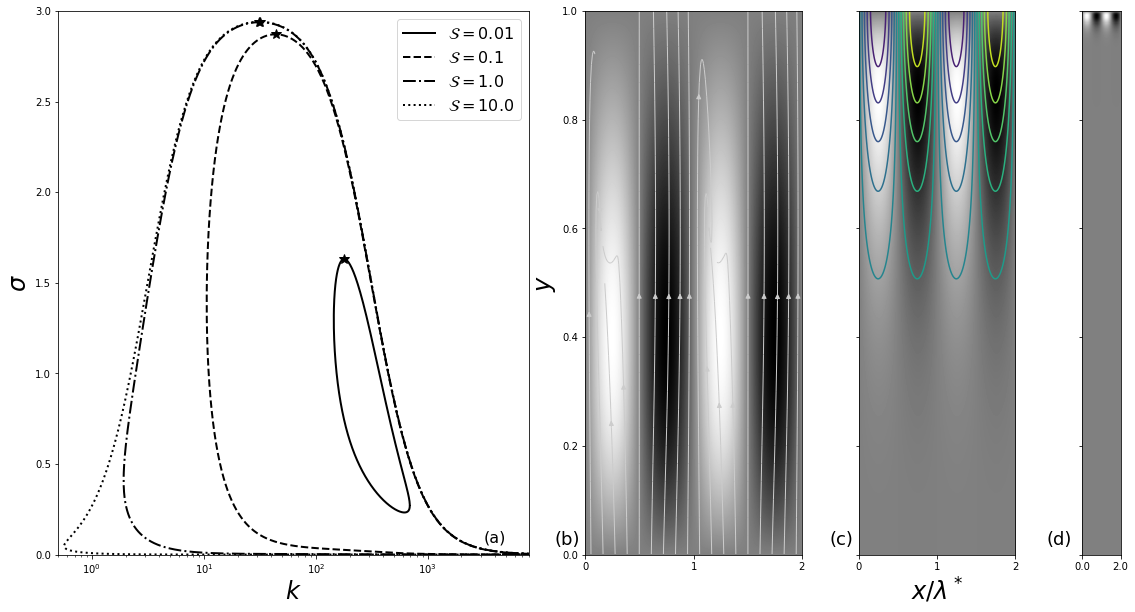

In [20]:
zoom = 2.0
fig = plt.figure(figsize=(zoom*9.7, zoom*5.0))
gs = gridspec.GridSpec(1, 4, width_ratios=[6, 3, 2, 1])

ax0 = plt.subplot(gs[0])
for s_, lstyi, S_ in zip(s, {'--k', '-k', '-.k', ':k'}, S):
    ax0.semilogx(s_.k, s_.s, lstyi, linewidth=2, 
                 label=r'$\mathcal{S}=' + str(np.real(S_).astype(np.float32)) + '$')
    ax0.plot(s_.kmax, s_.smax, '*k', linewidth=1, markersize=10)
ax0.set_xlabel(r'$k$', fontsize=24)
ax0.set_xlim(0.5, 8000)
ax0.set_xticks(ticks=(1.e0, 1.e1, 1.e2, 1.e3))
ax0.set_ylabel(r'$\sigma$', fontsize=24)
ax0.set_ylim(0.0, 3.0)
ax0.legend(fontsize=16)
ax0.text(0.5e4, 0.05, '(a)', fontsize=16, verticalalignment='bottom', horizontalalignment='right')

AR = 2 * np.pi / np.asarray([s[2].kmax, s[1].kmax, s[0].kmax])

ax1 = plt.subplot(gs[1])
lambda_ = np.float32(AR[0])
ax1 = plt.subplot(gs[1])
ax1.imshow(np.real(s[2].P).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax1.set_ylabel(r'$y$', fontsize=24)
nlines = 18
h = 2 * lambda_ / (nlines + 1)
seed = np.zeros((nlines, 2))
seed[:, 0] = np.linspace(0.5 * h, 2.0 * lambda_ - 0.5 * h, nlines)
seed[:, 1] = np.ones_like(seed[:, 0]) / 1000.0
epsilon = 3e-3
U = epsilon * np.real(s[2].U).astype(np.float64)
W = 1.0 + epsilon * np.real(s[2].W).astype(np.float64)
x = np.linspace(0, 2 * lambda_, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
ax1.streamplot(X, Y, U, W, start_points=seed,
               integration_direction='forward', color=[0.8, 0.8, 0.8], linewidth=1)
ax1.set_xticks((0, AR[0], 2*AR[0]))
ax1.set_xticklabels((0, 1, 2))
ax1.text(-0.01, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax2 = plt.subplot(gs[2])
lambda_ = np.float32(AR[1])
ax2 = plt.subplot(gs[2])
ax2.imshow(np.flipud(np.real(s[1].P)).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
x = np.linspace(0, 2 * lambda_, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
ax2.contour(X, Y, np.real(s[1].phi).astype(np.float32), levels=np.linspace(0, 1, 12))
ax2.set_xticks((0, lambda_, 2*lambda_))
ax2.set_xticklabels((0, 1, 2))
ax2.set_yticklabels(())
ax2.set_xlabel(r'$x/\lambda^*$', fontsize=24)
ax2.text(-0.01, 0.01, r'(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax3 = plt.subplot(gs[3])
lambda_ = np.float32(AR[2])
ax3.imshow(np.flipud(np.real(s[0].P)).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax3.set_xticks((0, 2*lambda_))
ax3.set_xticklabels((0., 2.))
ax3.set_yticklabels(())
plt.text(-0.02, 0.01, r'(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

Equation \eqref{eq:rxflow-analytical-sigma-full} is exact but difficult to analyse. We therefore design an approximation to be valid only near the peak growth rate:

\begin{equation}
  \label{eq:rxflow-asymptotic-sigma}
  \sigma\sim\permexp(1-\epsilon),\quad\epsilon \ll 1
\end{equation}

and substitute, dropping the $\permexp/\Da\stiff$ terms. We find that

\begin{align}
    \label{eq:rxflow-analytic-real-im-asymptotic_a}
    a &\sim \frac{1}{2\stiff} + \frac{\wavenumber^2}{2\Da}, \\
    \label{eq:rxflow-analytic-real-im-asymptotic_e}
    \epsilon & \sim \frac{a^2 + b^2}{\wavenumber^2} + \frac{\wavenumber^2}{\Da\Pe}.
\end{align}

Here we have made the additional approximation that near the maximum growth rate (i.e., for $\wavenumber\approx\wavenumber^*$ at which $\epsilon \ll 1$), $\wavenumber^2/\Da\Pe \ll 1$ and hence that $\Kk \sim 1$.

The maximum growth rate $\sigma\sim\sigma^*$ occurs where $\epsilon$ is at a minimum with respect to $\wavenumber$.  Using equations \eqref{eq:rxflow-analytic-real-im-asymptotic_a} - \eqref{eq:rxflow-analytic-real-im-asymptotic_e} we find that

\begin{equation}
  \label{eq:rxflow-kstar-full}
  \wavenumber^* \sim \left(\frac{4\Da\Pe\mathcal{B}}
    {4+\Pe/\Da}\right)^{1/4},
\end{equation}

where $\mathcal{B} \equiv b^2 + (2\stiff)^{-2}$. The maximum growth rate $\sigma^*$ of the channel instability is 

\begin{equation}
  \label{eq:rxflow-sstar-full}
  \sigma^* \sim \permexp\left[1 - 
    2\sqrt{\frac{\mathcal{B}(4+\Pe/\Da)}{\Da\Pe}}\right].
\end{equation}


In [21]:
class SA_Growth():
    def __init__(self):
        self.k = None
        self.a = None
        self.e = None
        self.s = None


def asym_maxgrowth(k, n, Da, Pe, S, l):
    b = l * np.pi
    B = b**2 + 1.0/4.0/S**2
    s_ = SA_Growth()
    k = np.power(4.0*Da*Pe*(b**2 + 1.0/4.0/S**2)/(4.0 + Pe/Da), 0.25)
    a = 1.0/2.0/S + k**2.0/2.0/Da
    e = (a**2 + b**2)/k**2 + k**2/Da/Pe
    s = n*(1.0 - 1.0/Da/2.0/S - 2.0*np.sqrt(B*(1.0/Da/Pe + 1.0/4.0/Da**2)))
    s_.k = np.real(k).astype(np.float32)
    s_.a = np.real(a).astype(np.float32)
    s_.e = np.real(e).astype(np.float32)
    s_.s = np.real(s).astype(np.float32)
    return s_

In [22]:
class SA_Dispersion():
    def __init__(self):
        self.s = None
        self.k = None


def asym_dispersion(k, n, Da, Pe, S, l):
    a = 1/2/S + k**2/2/Da
    b = l * np.pi
    epsilon = (a**2 + b**2)/k**2 + k**2/Da/Pe
    s = n*(1-epsilon)
    s[np.imag(s) != 0.0] = np.nan
    return np.real(s).astype(np.float32)


def full_dispersion(k, n, Da, Pe, S, l):
    b = np.clongdouble(l * np.pi)
    b2 = b ** 2
    k2 = k**2
    k4 = k2 * k2
    k6 = k2 * k4
    Da = np.clongdouble(Da)
    Da2 = Da ** 2
    Da3 = Da * Da2
    Da4 = Da2 * Da2
    K = 1.0 + k2 / Da / np.clongdouble(Pe)
    K2 = K ** 2
    K4 = K2 * K2
    S2 = np.clongdouble(S ** 2)

    # upper branch
    su = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                            - 2.0 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4) + 4.0 * Da * K * b2 * n
          + Da * K * k2 * n + 2.0 * Da2 * K * S * k2 * n) / (4.0 * S * Da2 * K2 * b2 + 4.0 * S * Da2 * K2 * k2 + S * k4)
    iu = np.imag(su) == 0.0
    # lower branch
    sl = -(2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                             - 2.0 * Da2 * K2 * b2 * k2 - Da*S*k6 - b2 * k4)
           - K*(4 * Da * n * b2 + n * (2.0 * S * Da2 + Da) * k2)) / (S*(4 * Da2 * K2 * b2 + 4.0 * Da2 * K2 * k2 + k4))
    il = np.imag(sl) == 0
    s = SA_Dispersion()
    s.s = np.hstack([np.flip(np.real(su[iu]).astype(np.float32)), np.real(sl[il]).astype(np.float32)])
    s.k = np.hstack([np.flip(np.real(k[iu]).astype(np.float32)), np.real(k[il]).astype(np.float32)])
    return s

Properties of the dispersion curve near its maximum, with $n=3,\,\Da=10^4,\,b=\pi$. __(a)__ Comparison of the exact dispersion relation \eqref{eq:rxflow-analytical-sigma-full} (solid lines) with the asymptotic relations \eqref{eq:rxflow-asymptotic-sigma}-\eqref{eq:rxflow-analytic-real-im-asymptotic_e} (dashed lines) for $\Pe/\Da=10^{-2}$ and two values of $\stiff$, as given in the legend. __(b)__ Contours of fastest-growing (non-dimensional) wavelength $\lambda^*$ for a range of $\stiff$ and $\Pe$ from equation \eqref{eq:rxflow-kstar-full}. Dotted lines are at $\Pe/\Da = 4$ and $\stiff = 1/2\pi$. In both panels, stars indicate the maximum ($\wavenumber^*,\sigma^*$) of the asymptotic curves, computed with \eqref{eq:rxflow-kstar-full} and \eqref{eq:rxflow-sstar-full}.

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


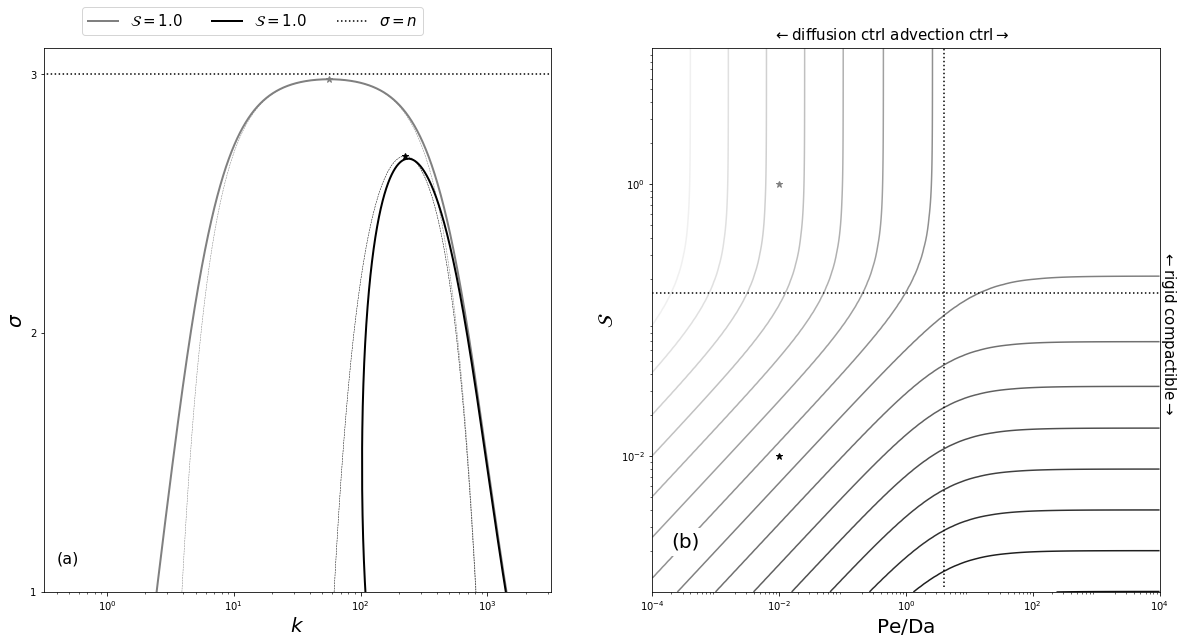

In [23]:
zoom = 2.0
fig = plt.figure(figsize=(10*zoom, 5*zoom))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])

Da = 1e4
k = np.logspace(-1, 4, 10000).astype(np.clongdouble)
n = 3
Pe = Da / 100
S = np.asarray([1.0, 0.01]).astype(np.clongdouble)
l = 1.0

sfull = full_dispersion(k, n, Da, Pe, S[0], l)
sasym = asym_dispersion(k, n, Da, Pe, S[0], l)
smax = asym_maxgrowth(k, n, Da, Pe, S[0], l)
ax0.loglog(sfull.k, sfull.s, '-k', linewidth=2, color=[0.5, 0.5, 0.5],
           label=r'$\mathcal{S}='+str(np.real(S[0]))+'$')
ax0.loglog(k, sasym, '--k', linewidth=0.5, color=[0.5, 0.5, 0.5])
ax0.plot(smax.k, smax.s, '*k', markersize=7, color=[0.5, 0.5, 0.5])

sfull = full_dispersion(k, n, Da, Pe, S[1], l)
sasym = asym_dispersion(k, n, Da, Pe, S[1], l)
smax = asym_maxgrowth(k, n, Da, Pe, S[1], l)
ax0.loglog(sfull.k, sfull.s, '-k', linewidth=2, label=r'$\mathcal{S}='+str(np.real(S[0]))+'$')
ax0.loglog(k, sasym, '--k', linewidth=0.5)
ax0.plot(smax.k, smax.s, '*k', markersize=7)

ax0.plot([k[0], k[-1]], [n, n], ':k', label=r'$\sigma=n$')

ax0.set_xlim(np.sqrt(0.1), np.power(10, 3.5))
ax0.set_xticks([1.e0, 1.e1, 1.e2, 1.e3])
ax0.set_xlabel(r'$k$', fontsize=20)

ax0.set_ylabel(r'$\sigma$', fontsize=20)
ax0.set_ylim(1.0, 3.1)
ax0.set_yscale('linear')
ax0.set_yticks([1, 2, 3])

ax0.text(0.4, 1.1, r'(a)', fontsize=16, verticalalignment='bottom', horizontalalignment='left')

ax0.legend(fontsize=15, loc='upper left', bbox_to_anchor=(0.06, 1.09), ncol=3)

ax1 = plt.subplot(gs[1])

Spts = S
Pe_Da = Pe / Da

Pe = np.logspace(np.log10(Da) - 4.0, np.log10(Da) + 4, 100)
S = np.logspace(-3.0, 1.0, 100)
X, Y = np.meshgrid(Pe, S)
B = np.pi ** 2 + 1. / (2 * Y) ** 2
Ks = np.power(4 * Da * X * B / (4 + X / Da), 0.25)
lambda_ = 2 * np.pi / Ks

ax1.contour(Pe / Da, S, np.log10(lambda_), 16, cmap='gray')
ax1.plot([Pe[0]/Da, Pe[-1]/Da], [1/2/np.pi, 1/2/np.pi], ':k')
ax1.plot([4, 4], [S[1], S[-1]], ':k')
ax1.plot(Pe_Da, Spts[0], '*k', markersize=7, color=[0.5, 0.5, 0.5])
ax1.plot(Pe_Da, Spts[1], '*k', markersize=7)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks((1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4))
ax1.set_yticks((1.e-2, 1.e0))
ax1.set_ylabel(r'$\mathcal{S}$', fontsize=20)
ax1.set_xlabel(r'Pe$/$Da', fontsize=20)
ax1.text(0.0002, 0.002, r'(b)', fontsize=20, verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w')
ax1.text(1.4e4, 0.02, r'$\leftarrow$rigid compactible$\rightarrow$', rotation=-90, horizontalalignment='center',
         verticalalignment='bottom', fontsize=15)
ax1.text(0.58, 11, r'$\leftarrow$diffusion ctrl advection ctrl$\rightarrow$', horizontalalignment='center',
         verticalalignment='bottom', fontsize=15)

plt.show()

## Application to the mantle

Parameters and their values (and ranges) for application to the mantle beneath mid-ocean ridges:


| Variable (unit) | Symbol | Estimate (range) |
| --- | --- | --- | 
| Permeability exponent | $\permexp$ | $3$ $(2-3)$ |
| Solubility gradient (m$^{-1}$)  | $\beta$ | $2\times10^{-6}$ ($10^{-6}-4\times10^{-6}$) |
| Compositional offset | $\alpha$ | $1$ |
| Melting region depth (m) | $H$ | $8\times10^{4}$ |
| Compaction length (m) | $\cmplength$ | $10^{3}$  ($3\times10^2-10^4$) |
| Melt flux  (m s$^{-1}$)  | $\por_0 w_0$ | $3\times10^{-11}$ ($5\times10^{-12}-2\times10^{-10}$) |
| Diffusivity (m$^2$s$^{-1}$) | $\por_0 \chemdiffuse$ | $3\times10^{-14}$ ($10^{-15}-10^{-12}$) |
| Reaction rate (s$^{-1}$) | $\rxnrate$ | $3\times10^{-8}$ ($10^{-11}-10^{-4}$) |
| Decompression melting rate (s$^{-1}$) | $W_0\adiprod$ | $3\times10^{-15}$ ($10^{-15} - 10^{-14}$) |
| Melt productivity~ratio | $\dpro$ | $45$ ($1-200$)  |
| Reactive melt volume | $\rpro$ |  $0.14$ ($0.07-0.28$) |
| Peclet number | $\Pe$ | $7\times10^9$ ($3.5\times10^7 - 1.4\times10^{12}$) |
| Damköhler number | $\Da$ | $7 \times 10^7$ ($3.5\times10^3 - 1.4\times10^{12}$) |
| Stiffness number | $\stiff$ | $3\times10^{-5}$ ($1\times10^{-6} - 6\times10^{-3}$) | 

In [24]:
class PAR:
    def __init__(self):
        self.n = 3  # permeability exponent
        self.S = 3e-5  # rigidity parameter
        self.Da = 7e7  # Damkohler number
        self.Pe = 7e9  # Peclet number
        self.H = 8e4  # column height, metres
        self.tscale = 1 * 0.01 / 3e-11 / 2e-6 / (np.pi * 1e7)  # years


def Dispersion(k, n, Da, Pe, S):
    k = k.astype(np.clongdouble)
    k2 = k * k
    k4 = k2 * k2
    k6 = k4 * k2
    n, Da, Pe, S = np.clongdouble([n, Da, Pe, S])
    K = 1 + k ** 2 / Da / Pe
    K2 = K * K
    K4 = K2 * K2
    Da2 = Da * Da
    Da3 = Da2 * Da
    Da4 = Da2 * Da2
    b = np.clongdouble(np.pi)
    b2 = b * b
    S2 = S * S
    # upper branch
    s = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                           - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4) + 4.0 * Da * K * b2 * n + Da * K * k2 * n
         + 2 * Da2 * K * S * k2 * n) / (4 * S * Da2 * K2 * b2 + 4.0 * S * Da2 * K2 * k2 + S * k4)
    s[np.imag(s) != 0.0] = np.nan
    return np.real(s).astype(np.float32)

Figure below plots the time-scale of channel growth $1/\sigma$ as a function of the horizontal wavelength of channels.  This curve is computed using the full dispersion relation \eqref{eq:rxflow-analytical-sigma-full} with preferred parameter values from table above. Horizontal dotted lines mark the minimum growth time ($\sigma=1/\permexp$, in non-dimensional terms) and this value plus 2\%.

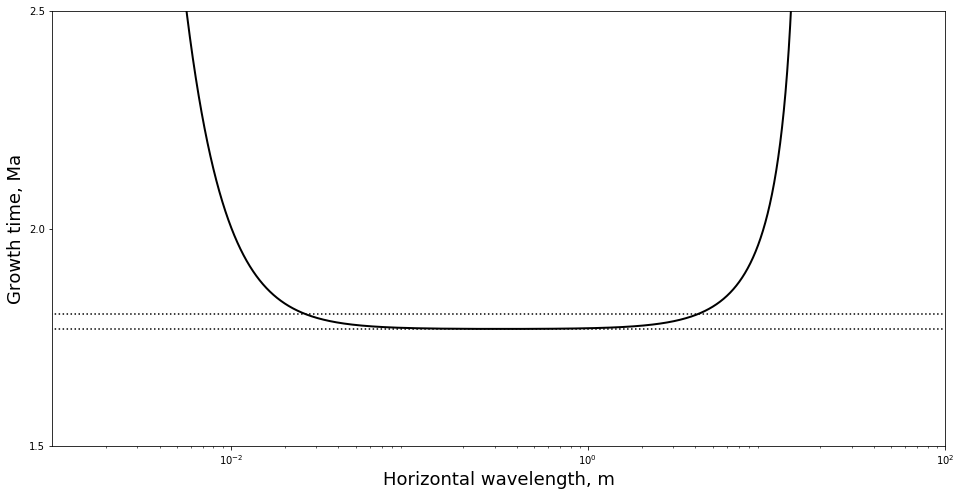

In [25]:
zoom = 2.0
fig = plt.figure(figsize=(8*zoom, 4*zoom))

par = PAR()
k = np.logspace(4, 8, 10000)
s = Dispersion(k, par.n, par.Da, par.Pe, par.S)

lambda_ = (2 * np.pi / k) * par.H  # metres
tau = (1. / s) * par.tscale / 1e6  # million years
tau_ref = (1. / par.n) * par.tscale / 1e6  # million years
tau_ref90 = (1.02 / par.n) * par.tscale / 1e6  # million years

plt.semilogx(lambda_, tau, '-k', linewidth=2)
plt.plot([1e-5, 1e5], [tau_ref, tau_ref], ':k')
plt.plot([1e-5, 1e5], [tau_ref90, tau_ref90], ':k')
plt.xlim(1e-3, 1e2)
plt.ylim(1.5, 2.5)
plt.xticks((1e-2, 1e0, 1e2))
plt.yticks((1.5, 2.0, 2.5))
plt.xlabel('Horizontal wavelength, m', fontsize=18)
plt.ylabel('Growth time, Ma', fontsize=18)

plt.show()